In [8]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
directory=r"csv_files"

In [9]:
fm=pd.read_csv('x1102_FM_power.csv',skiprows=1)
fm=fm.iloc[:,0:3]
fm['Timestamp']=fm['Data']+'T'+fm['Ora']
fm['Timestamp']=pd.to_datetime(fm['Timestamp'],format="%d.%m.%YT%H:%M:%S")

In [10]:
fm

Data       Ora  PT (1 s)\nW           Timestamp
0       04.04.2024  09:04:01       104736 2024-04-04 09:04:01
1       04.04.2024  09:04:02       104755 2024-04-04 09:04:02
2       04.04.2024  09:04:03       104729 2024-04-04 09:04:03
3       04.04.2024  09:04:04       104703 2024-04-04 09:04:04
4       04.04.2024  09:04:05       104711 2024-04-04 09:04:05
...            ...       ...          ...                 ...
312894  07.04.2024  23:58:55       205013 2024-04-07 23:58:55
312895  07.04.2024  23:58:56       214785 2024-04-07 23:58:56
312896  07.04.2024  23:58:57       198914 2024-04-07 23:58:57
312897  07.04.2024  23:58:58       189209 2024-04-07 23:58:58
312898  07.04.2024  23:58:59       208627 2024-04-07 23:58:59

[312899 rows x 4 columns]

In [11]:
def check(x):
    if len(x.dropna())==0:
        return 0
    else:
        return x

x1102_final_data.202404060609.dwdi.csv


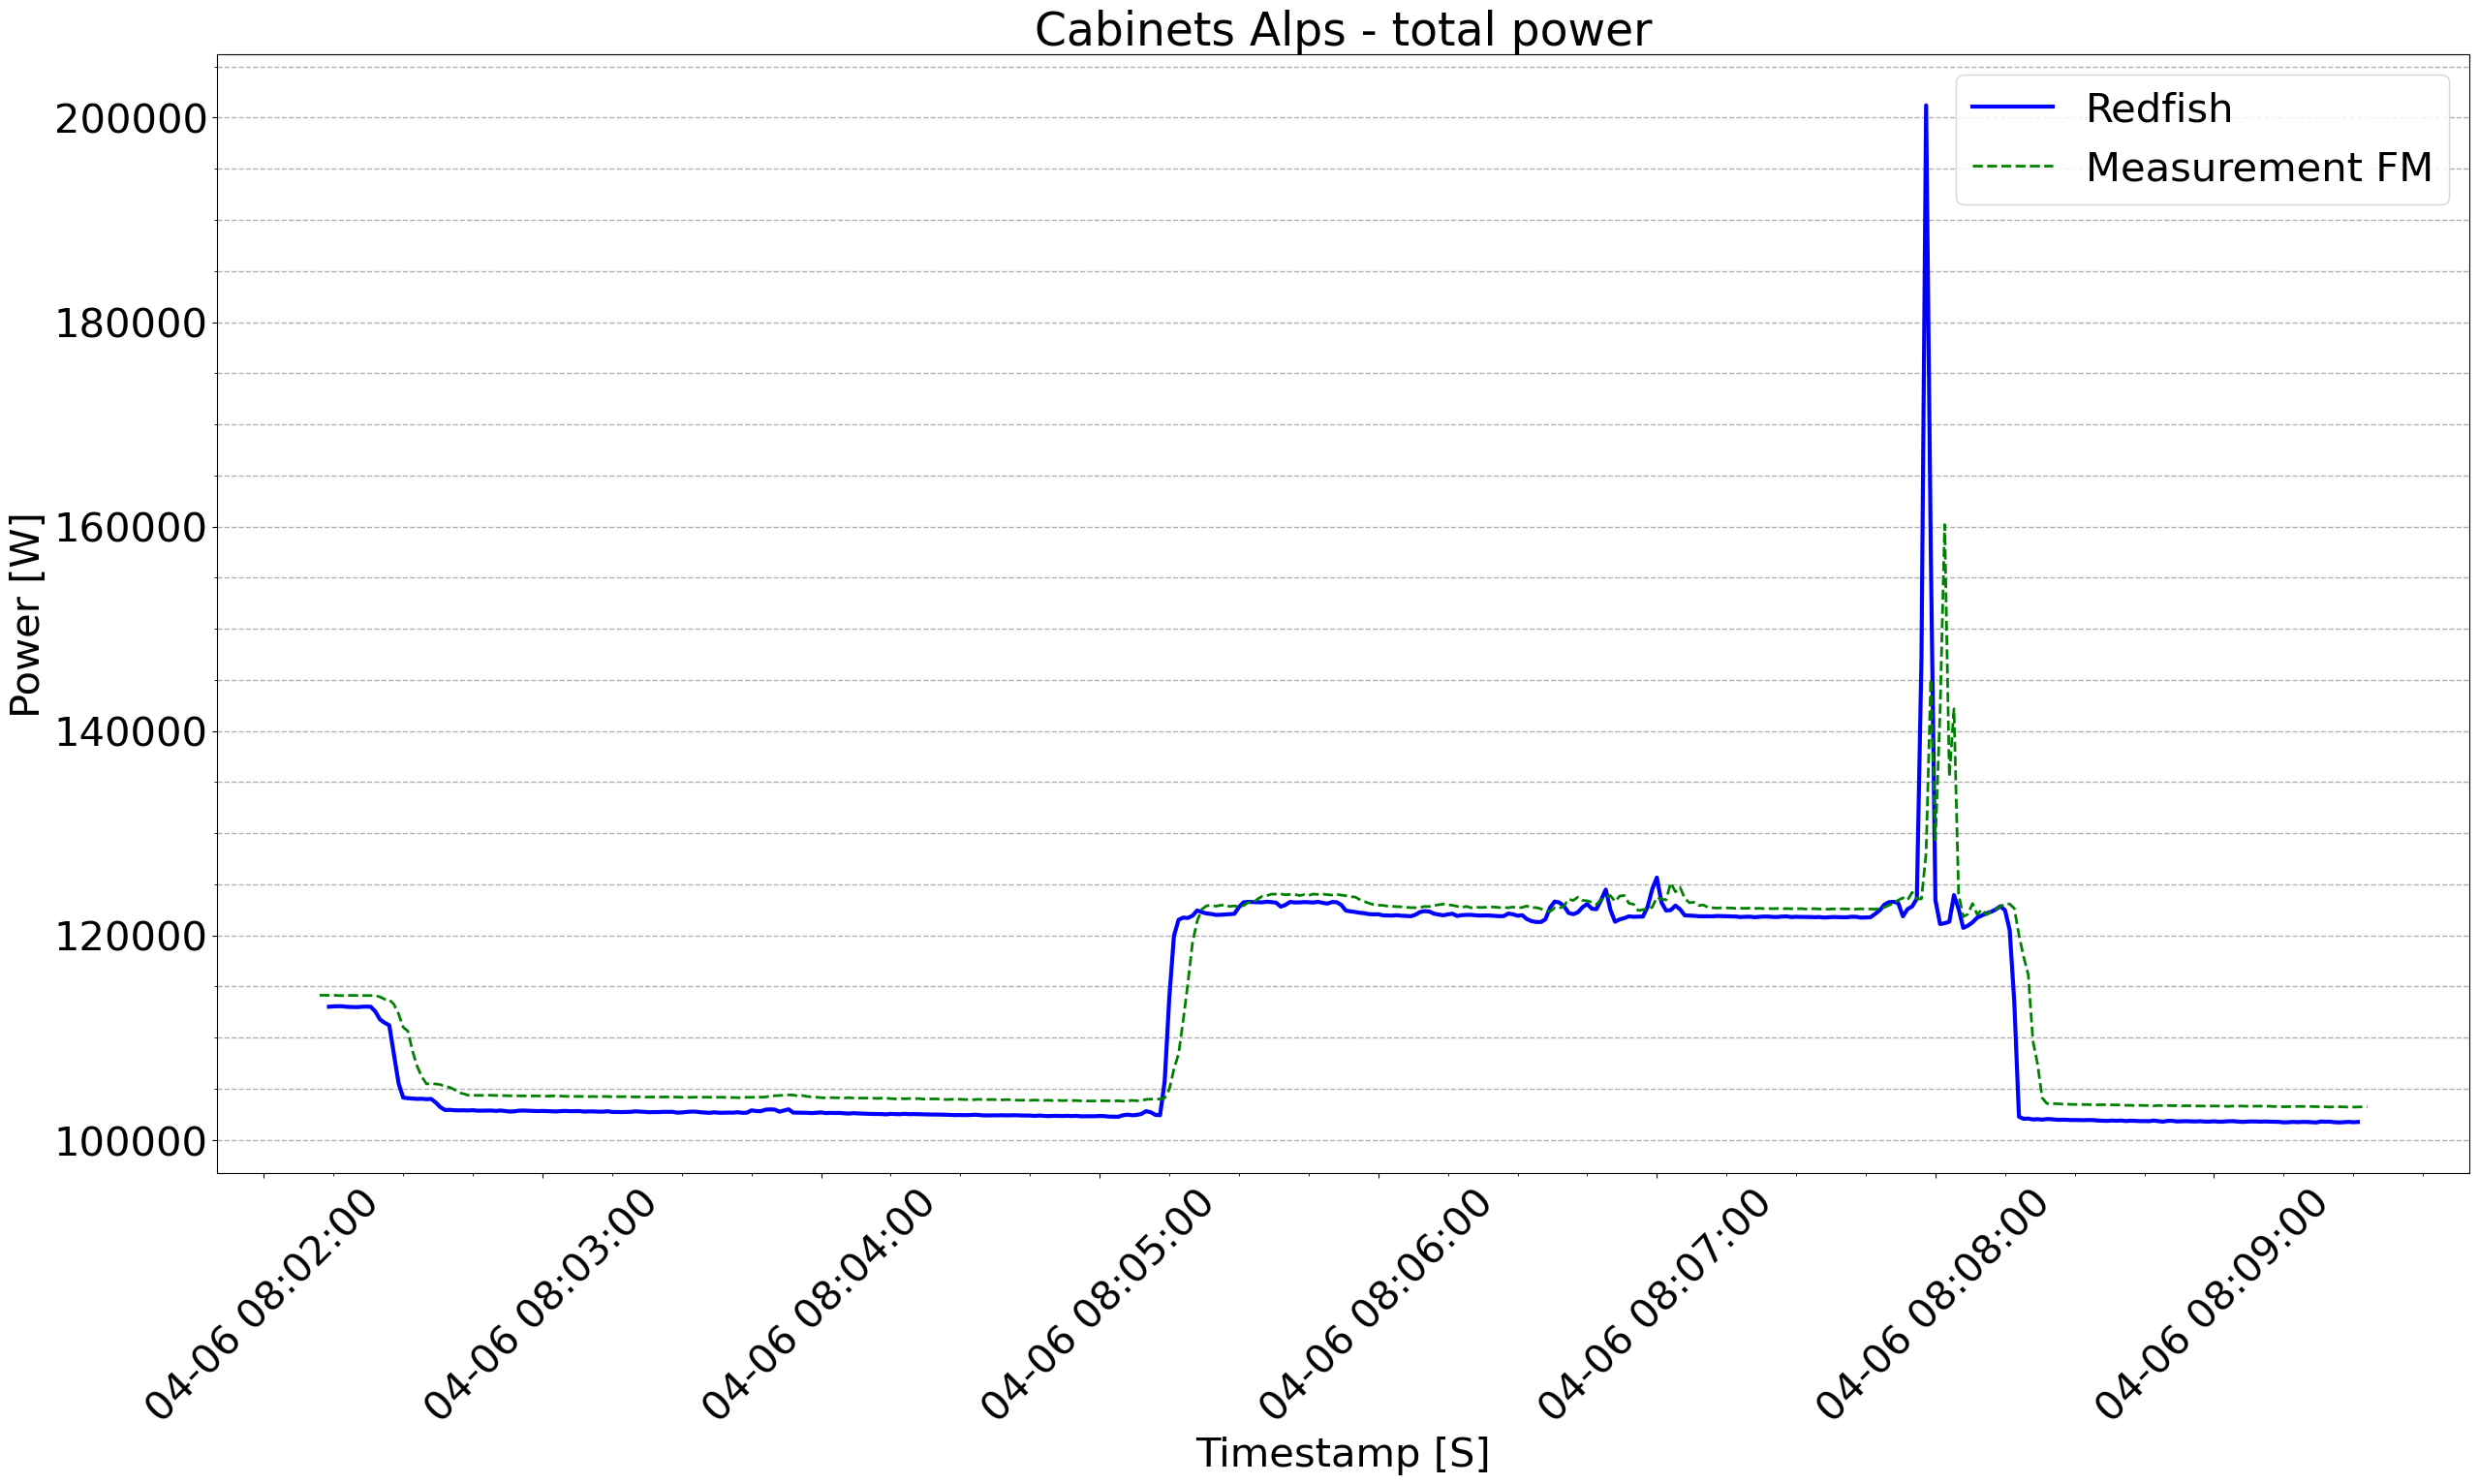

x1102_final_data.202404060703.dwdi.csv


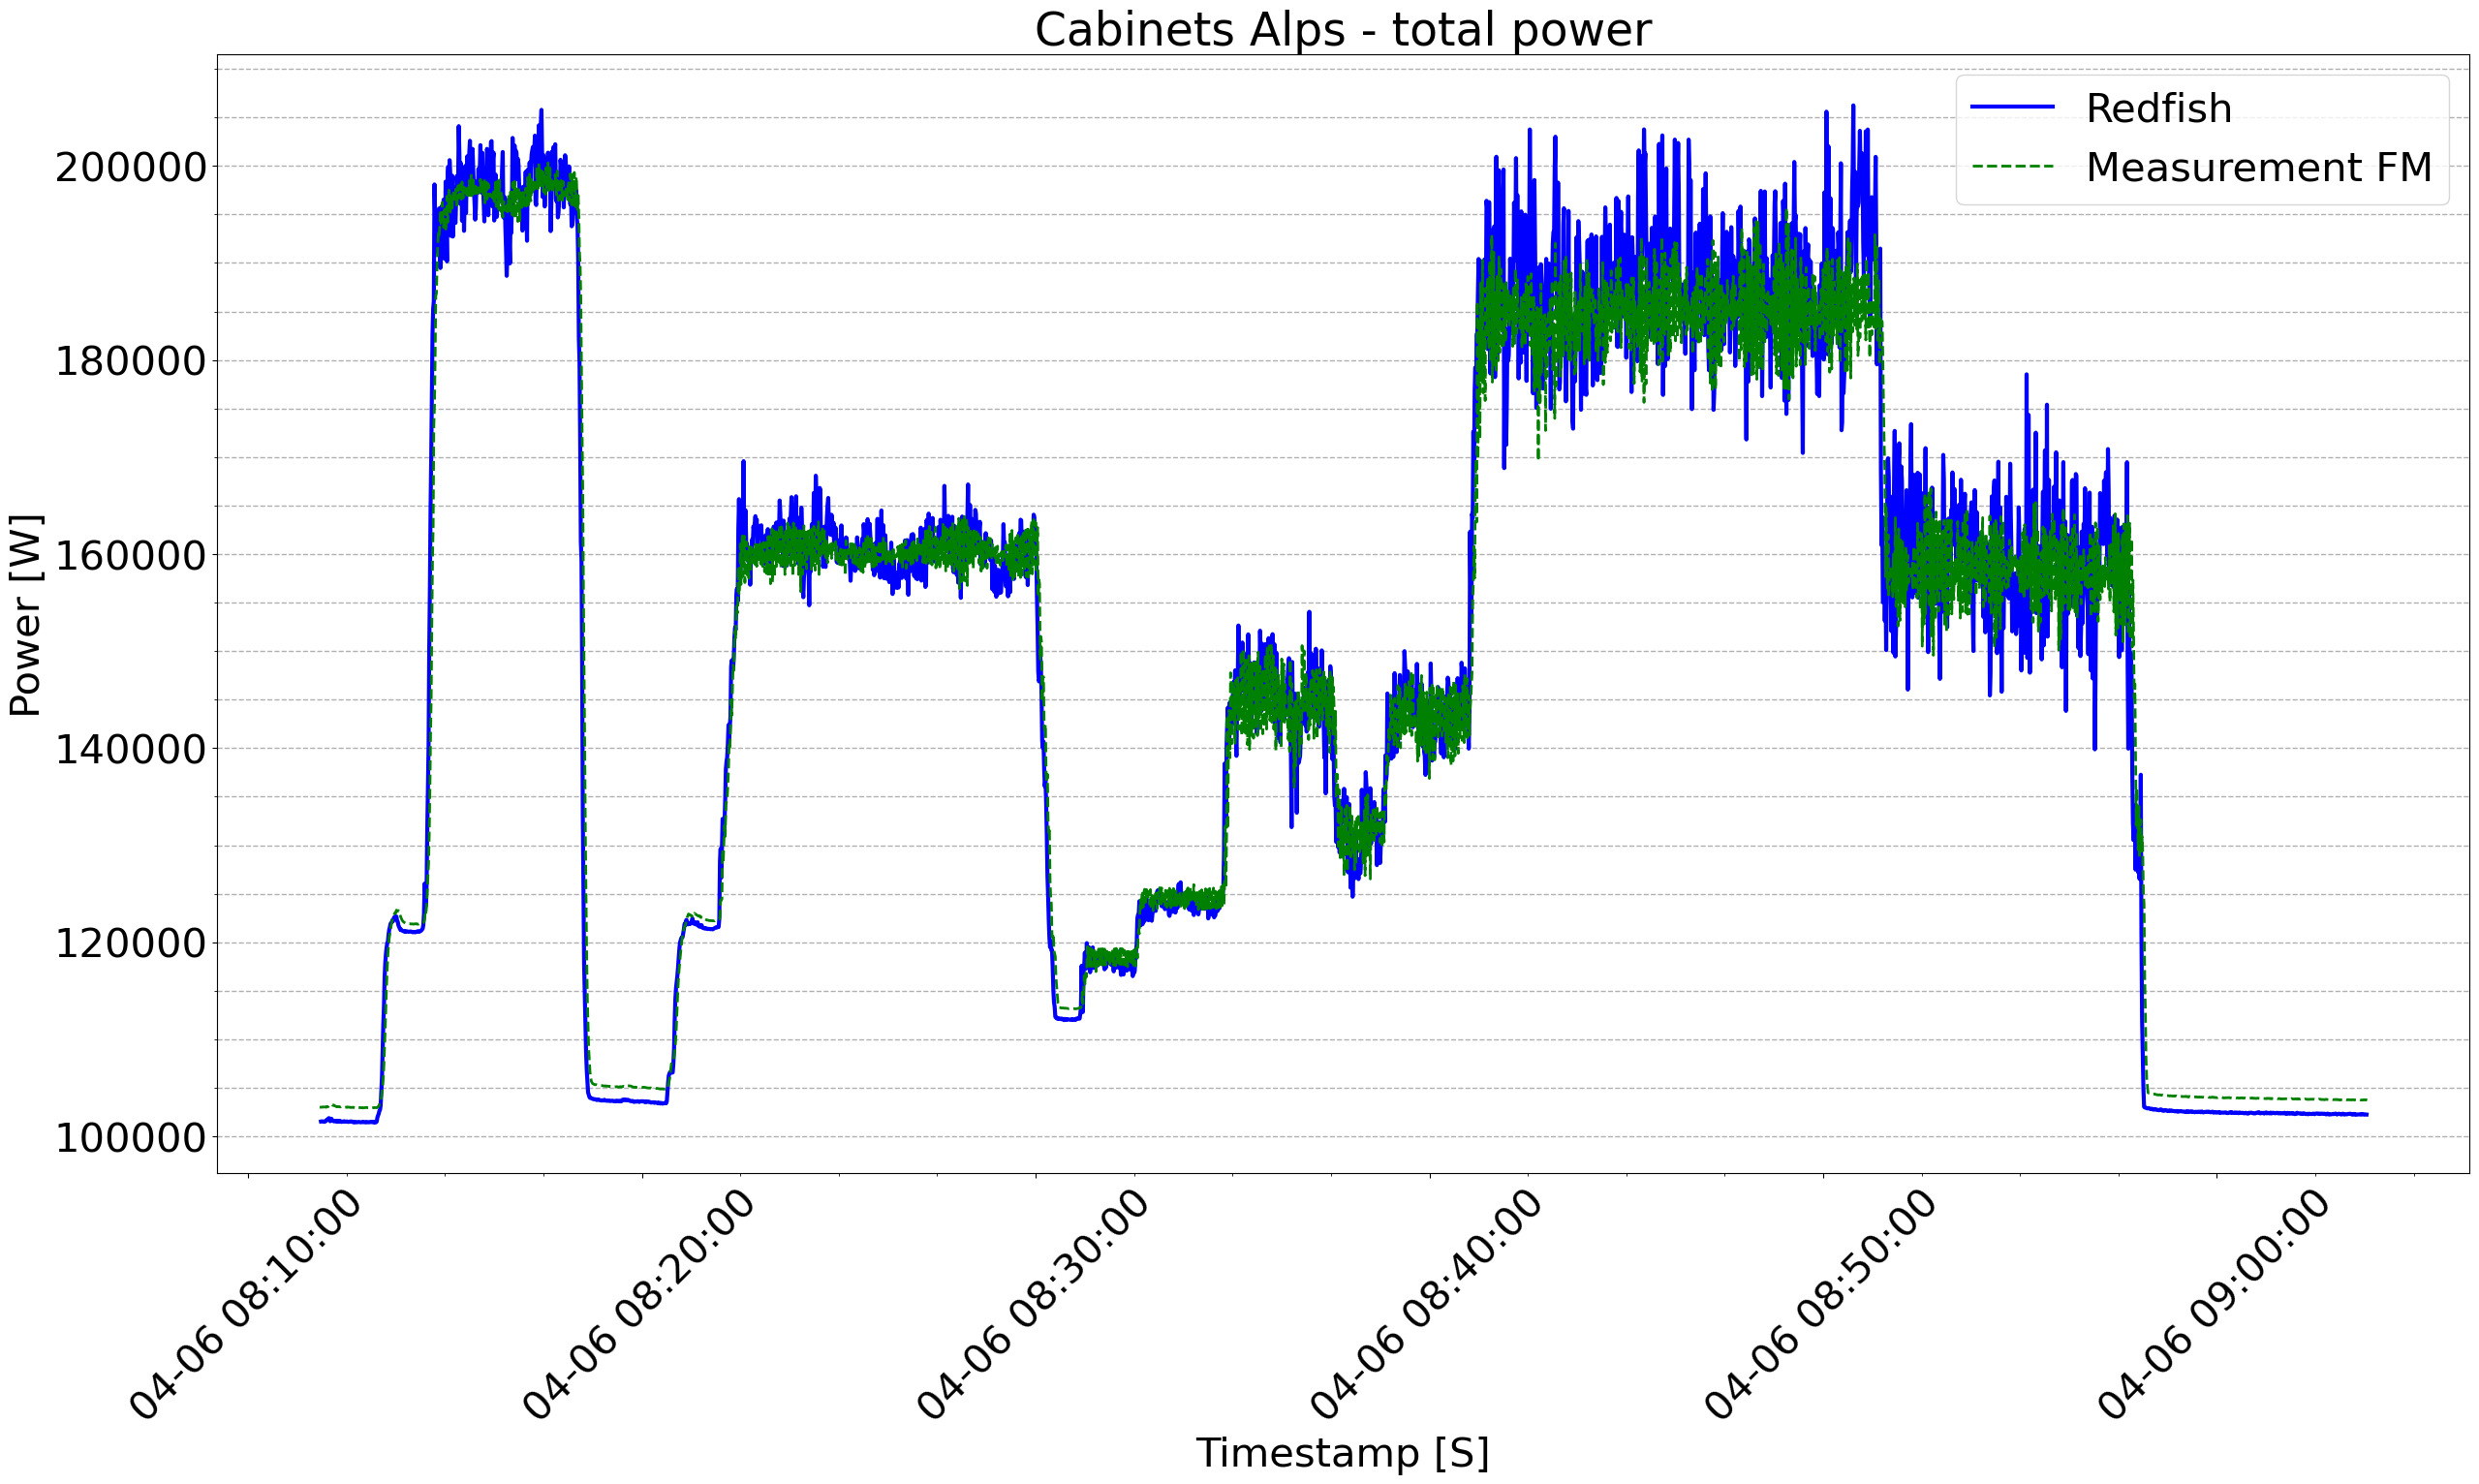

x1102_final_data.202404061851.dwdi.csv


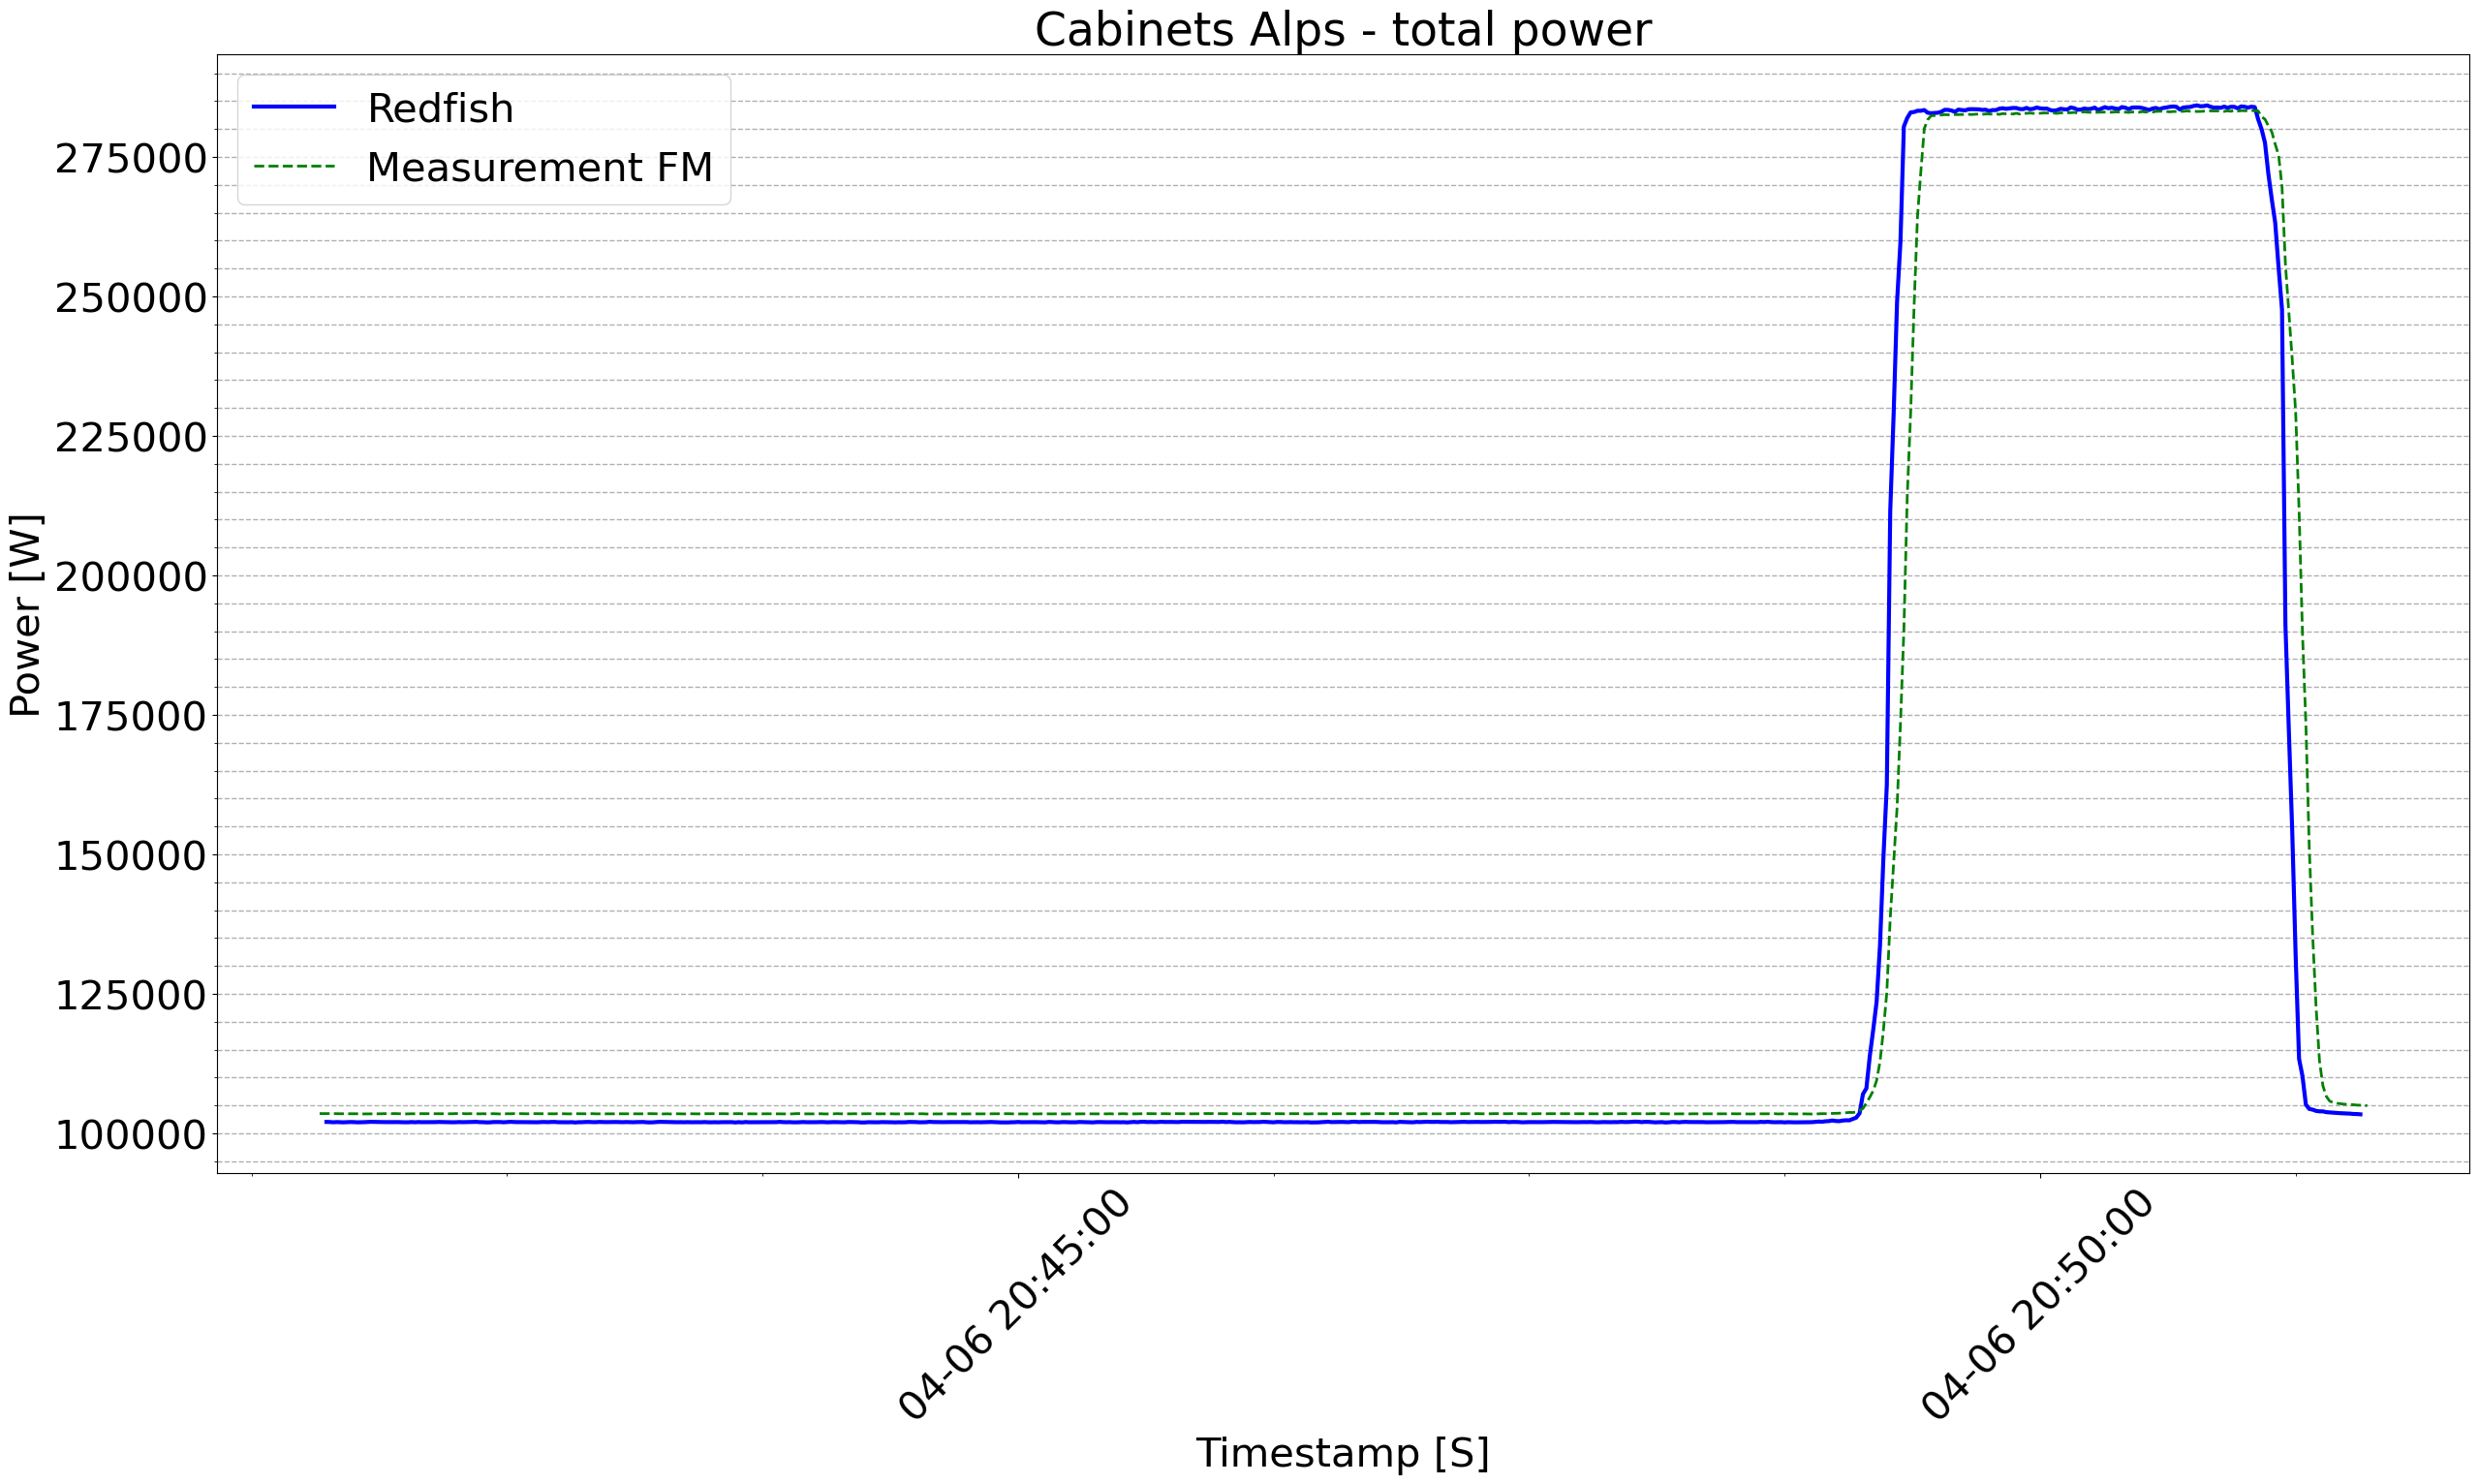

x1102_final_data.202404020730.dwdi.csv


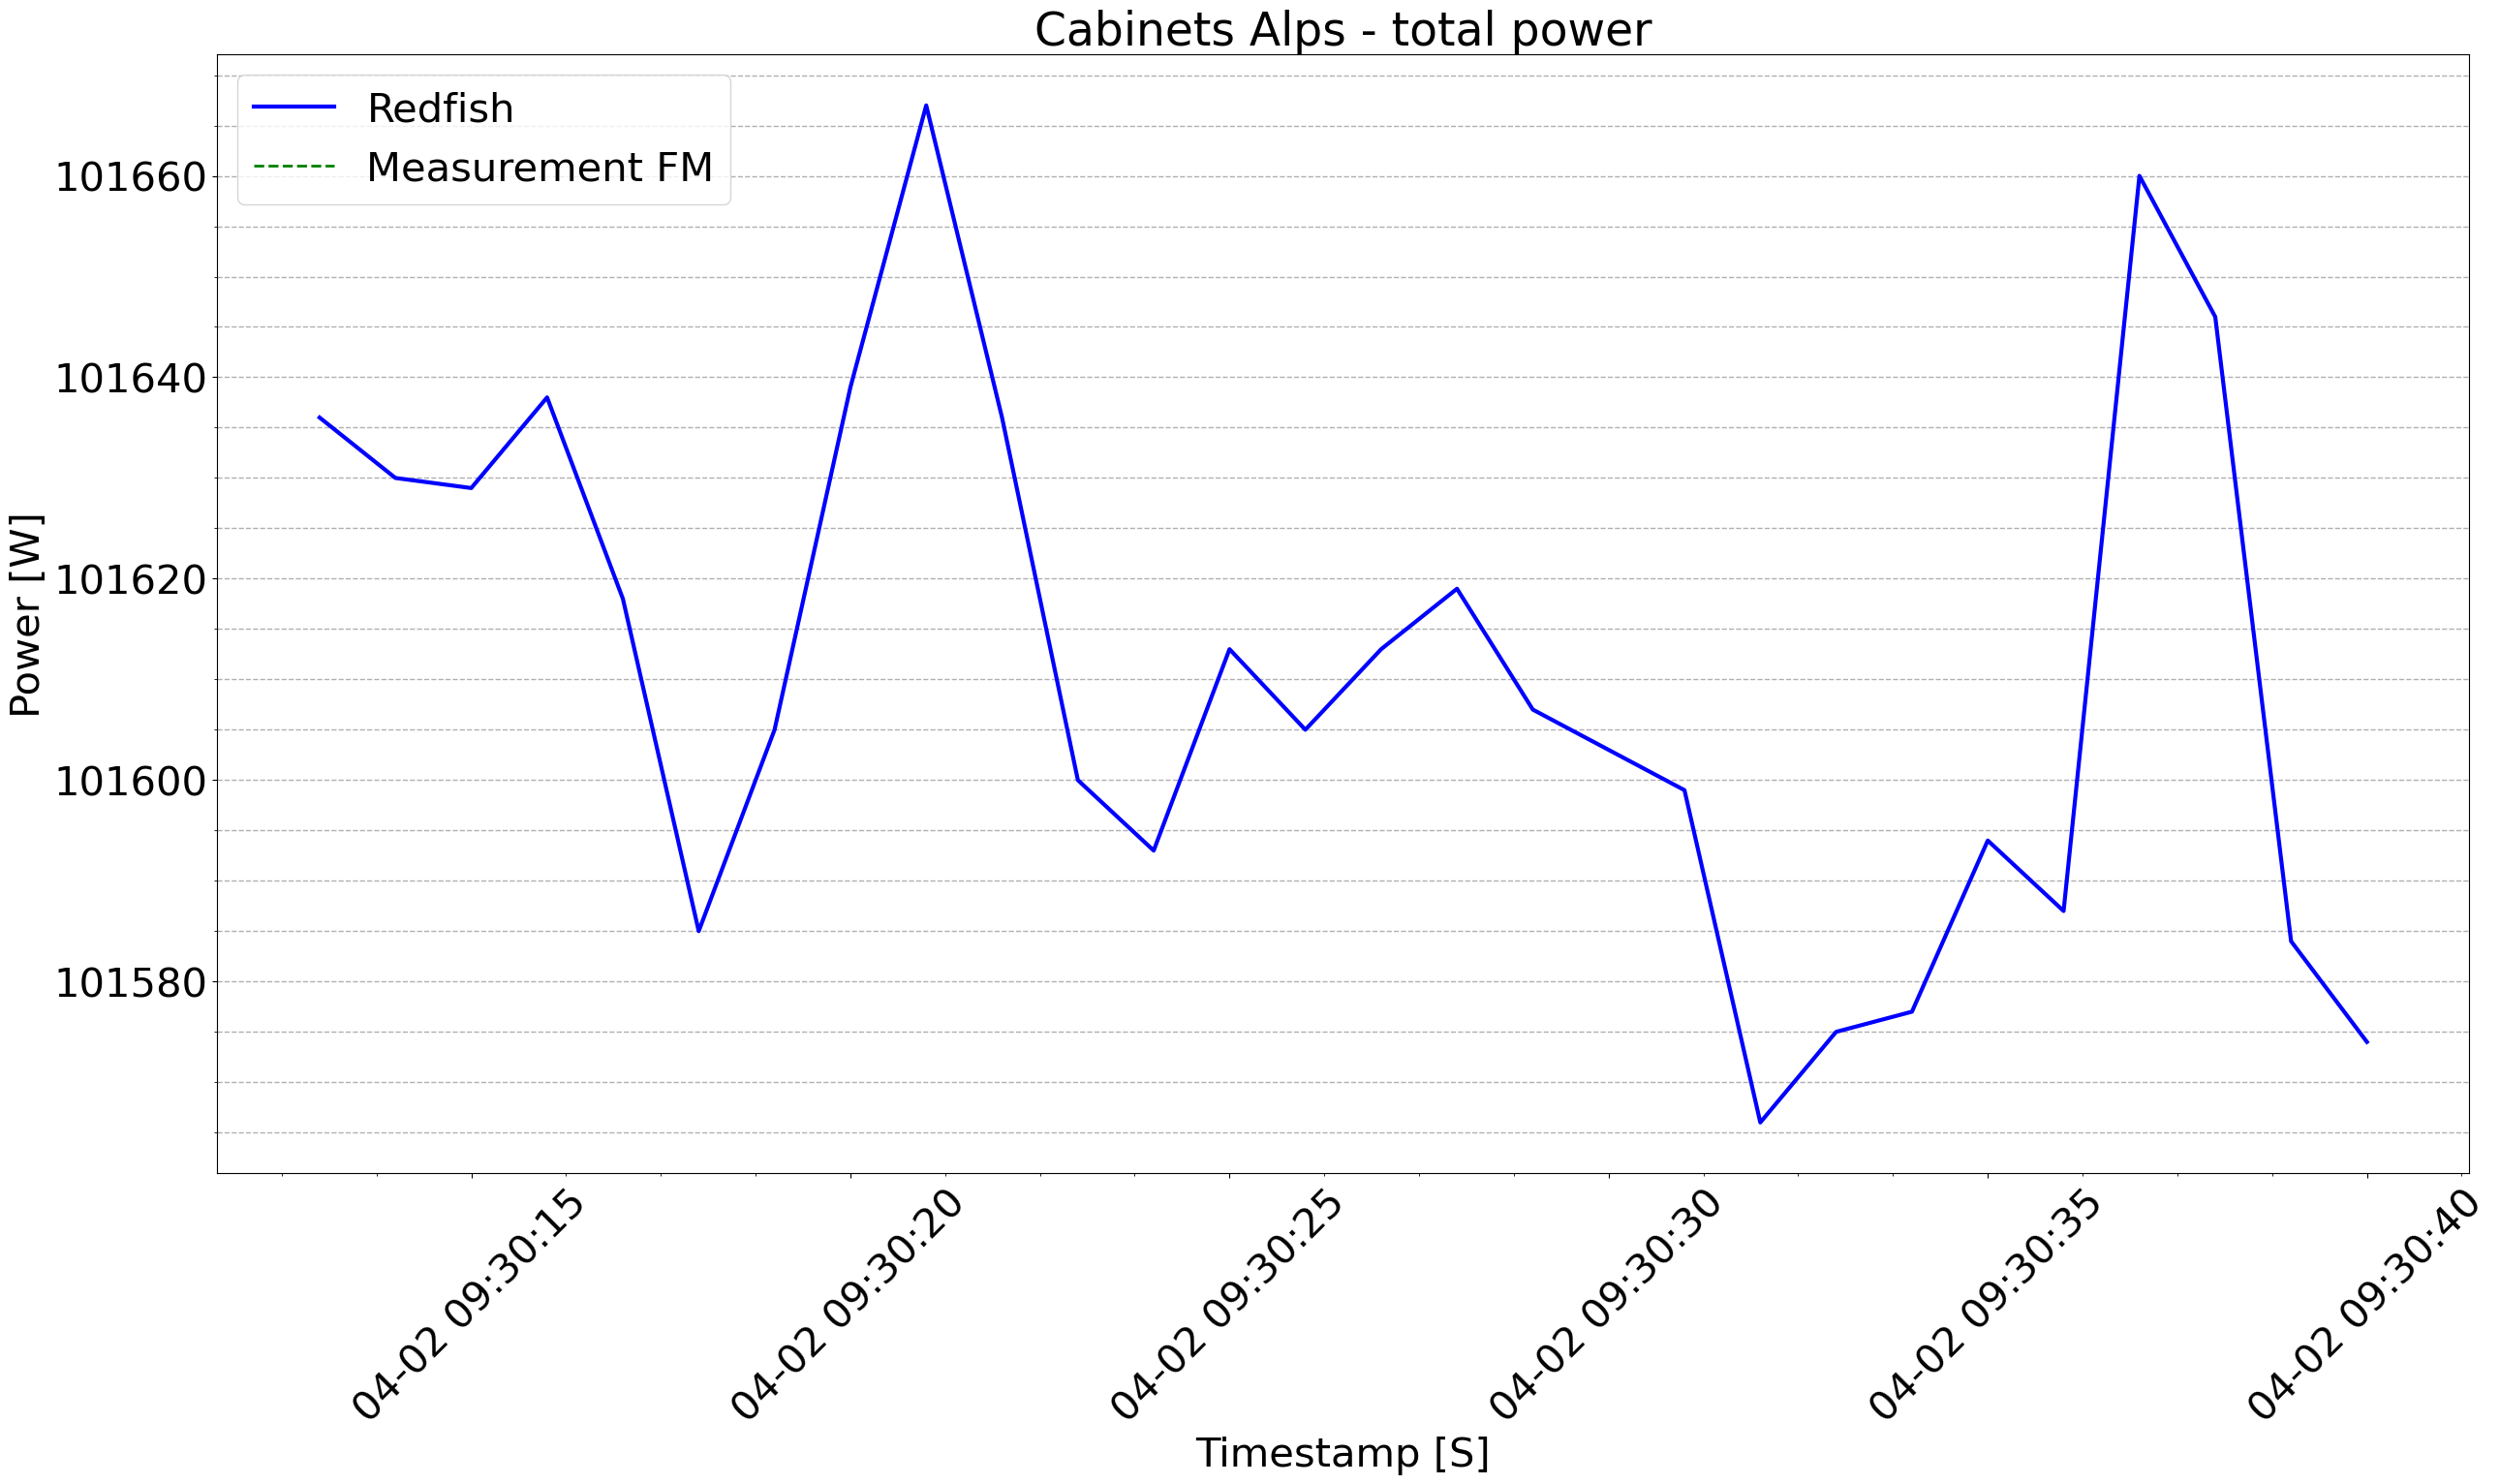

x1102_final_data.202403300946.dwdi.csv


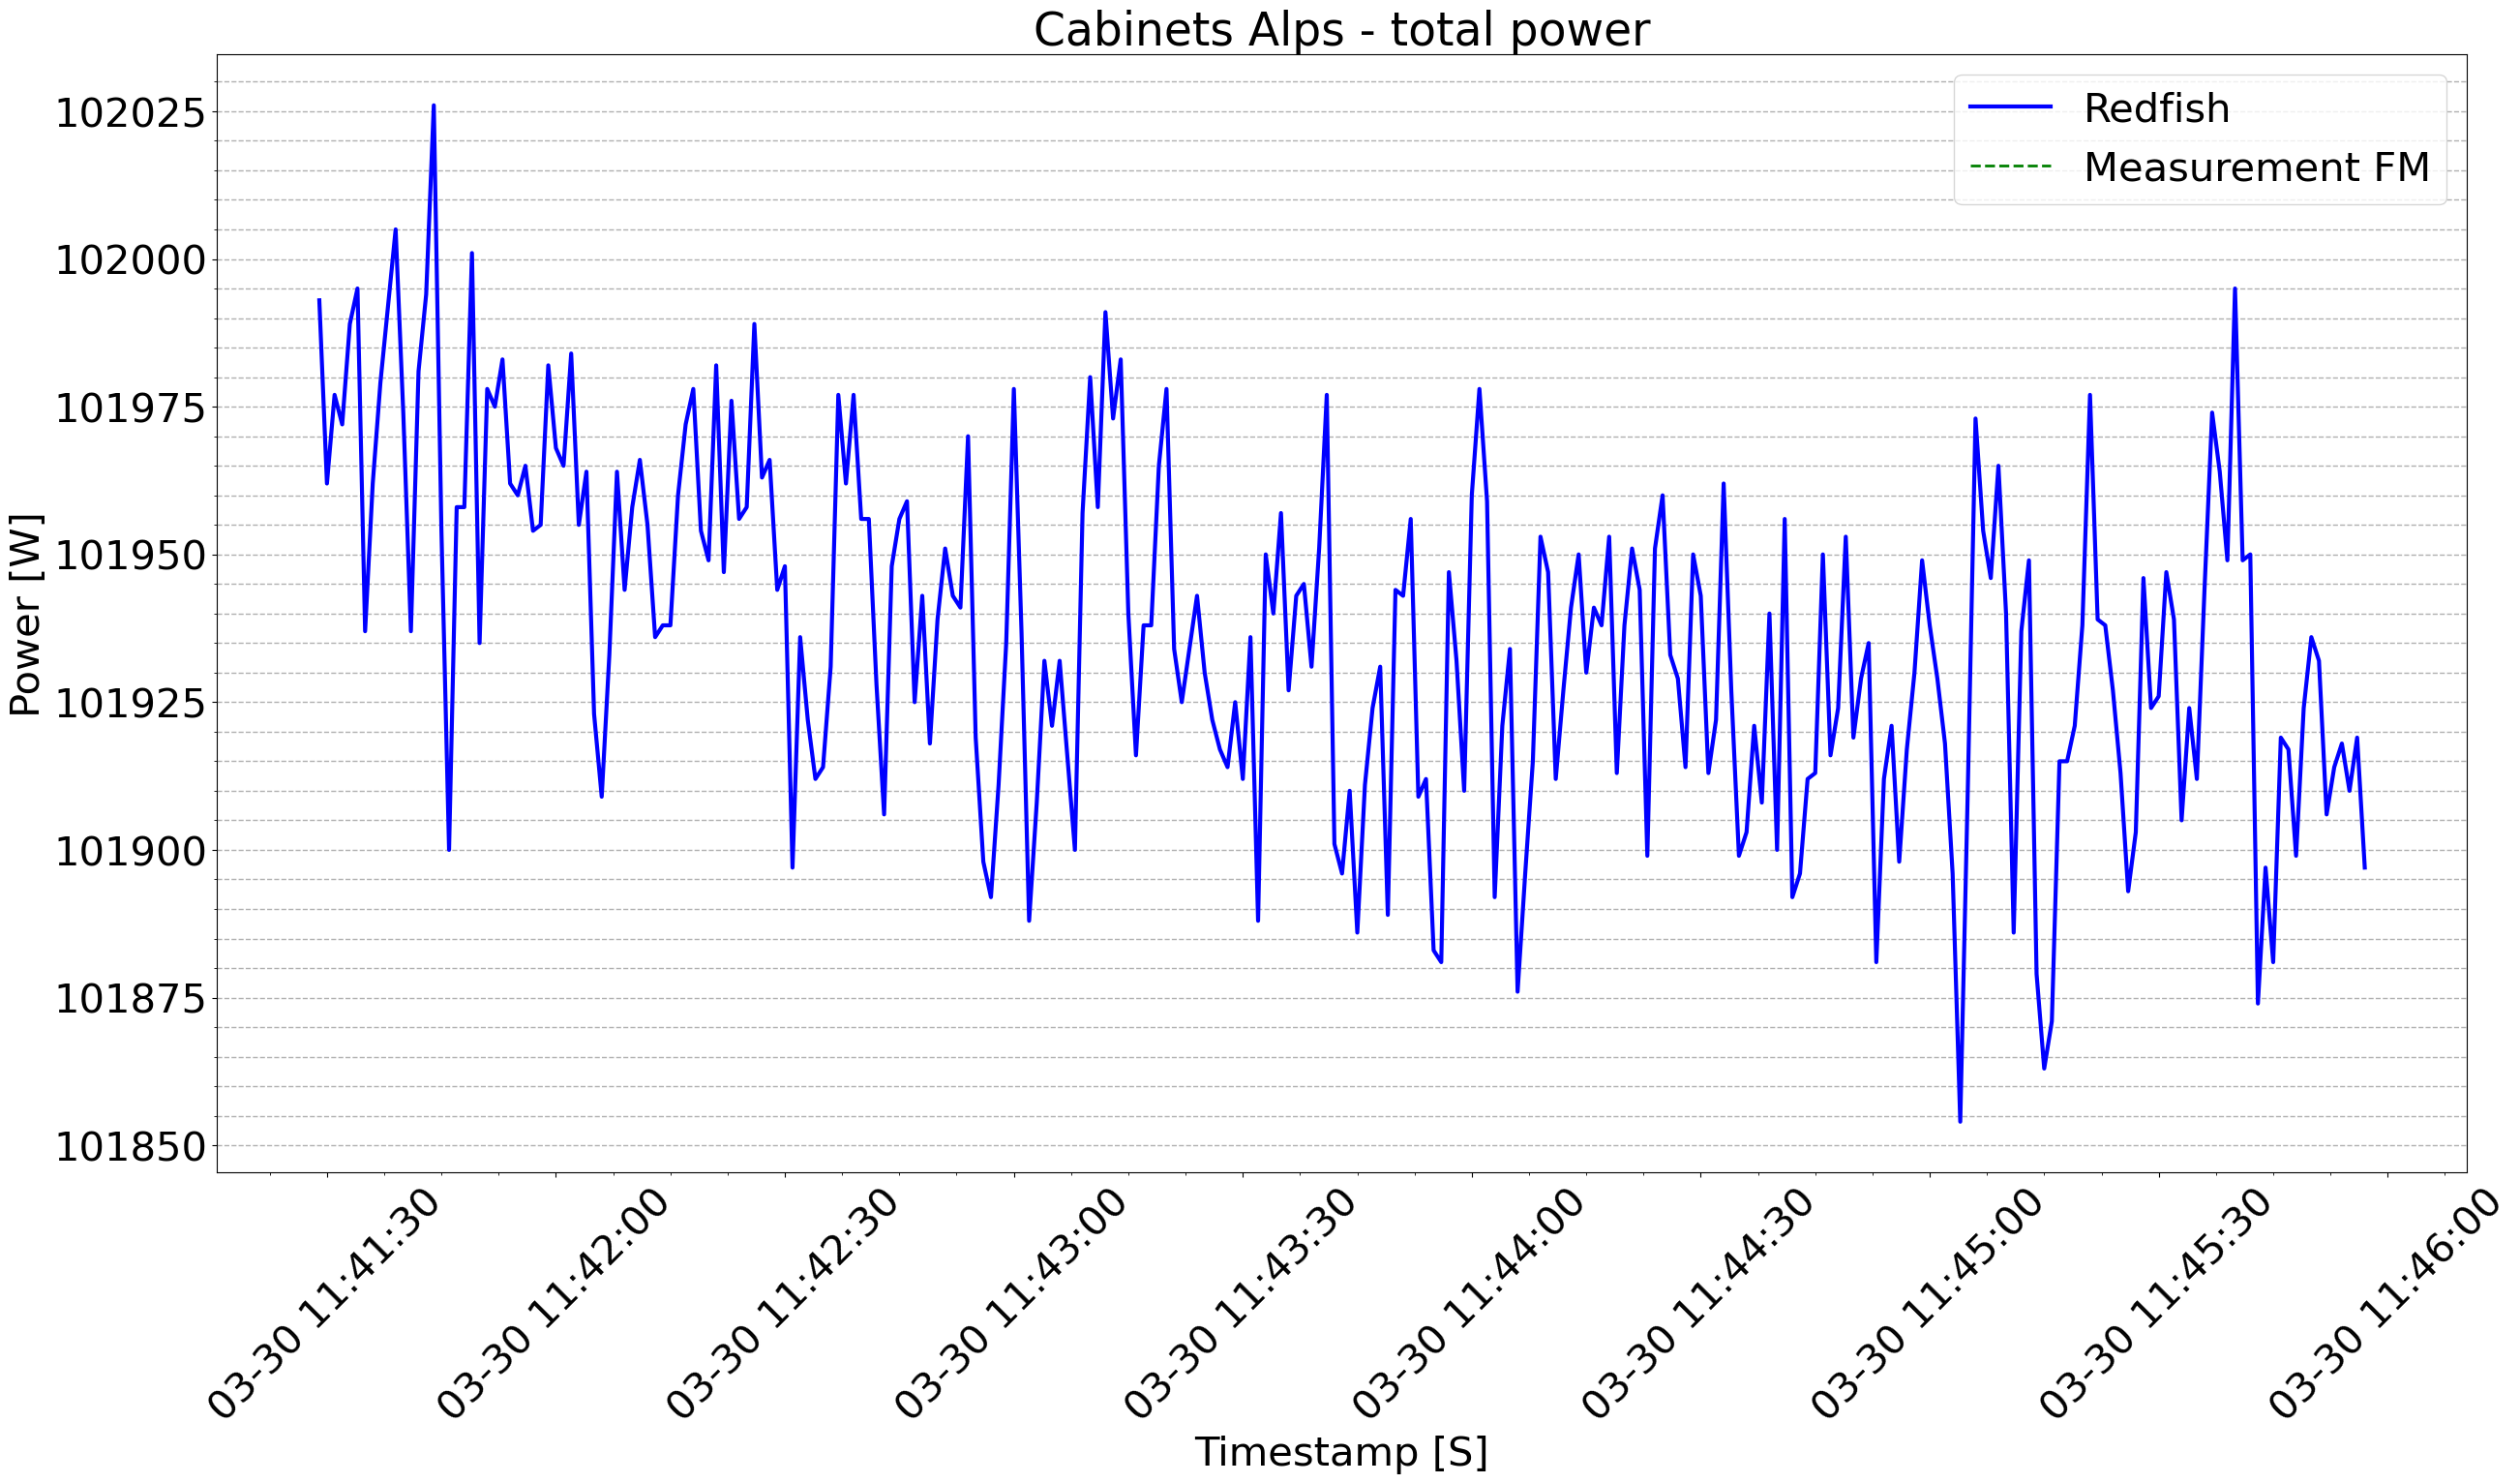

x1102_final_data.202404031454.dwdi.csv


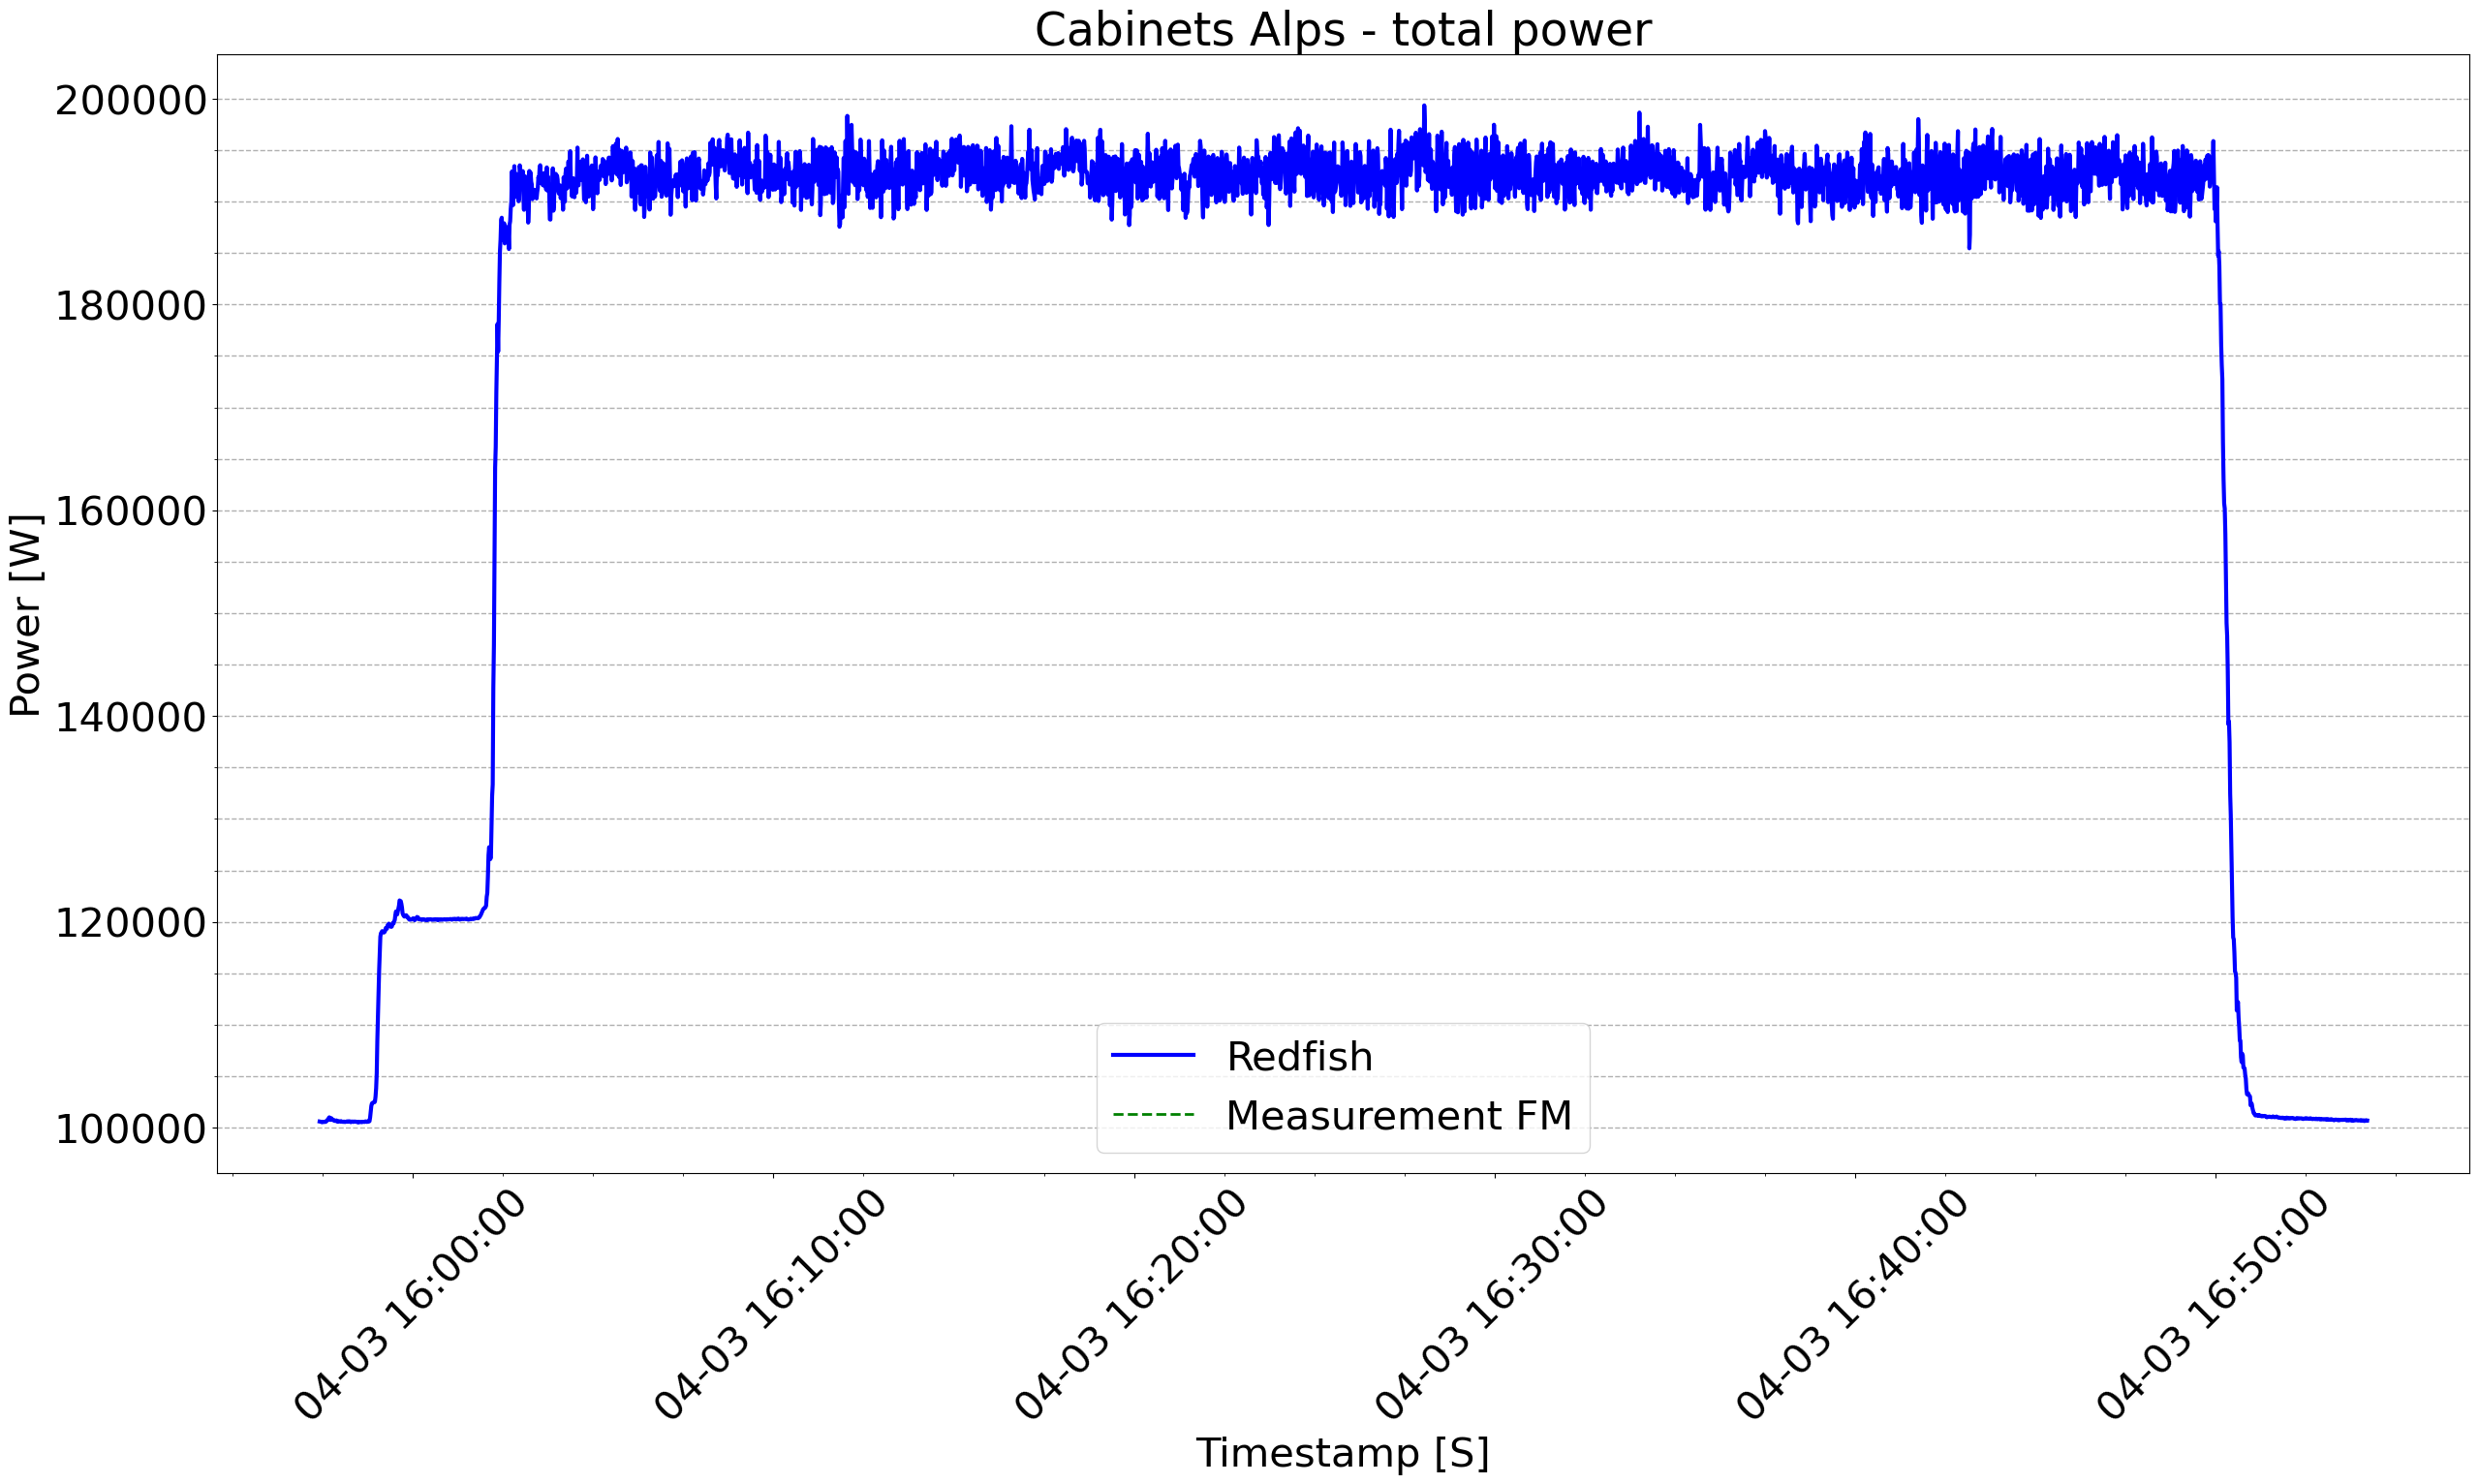

x1102_final_data.202404041321.dwdi.csv


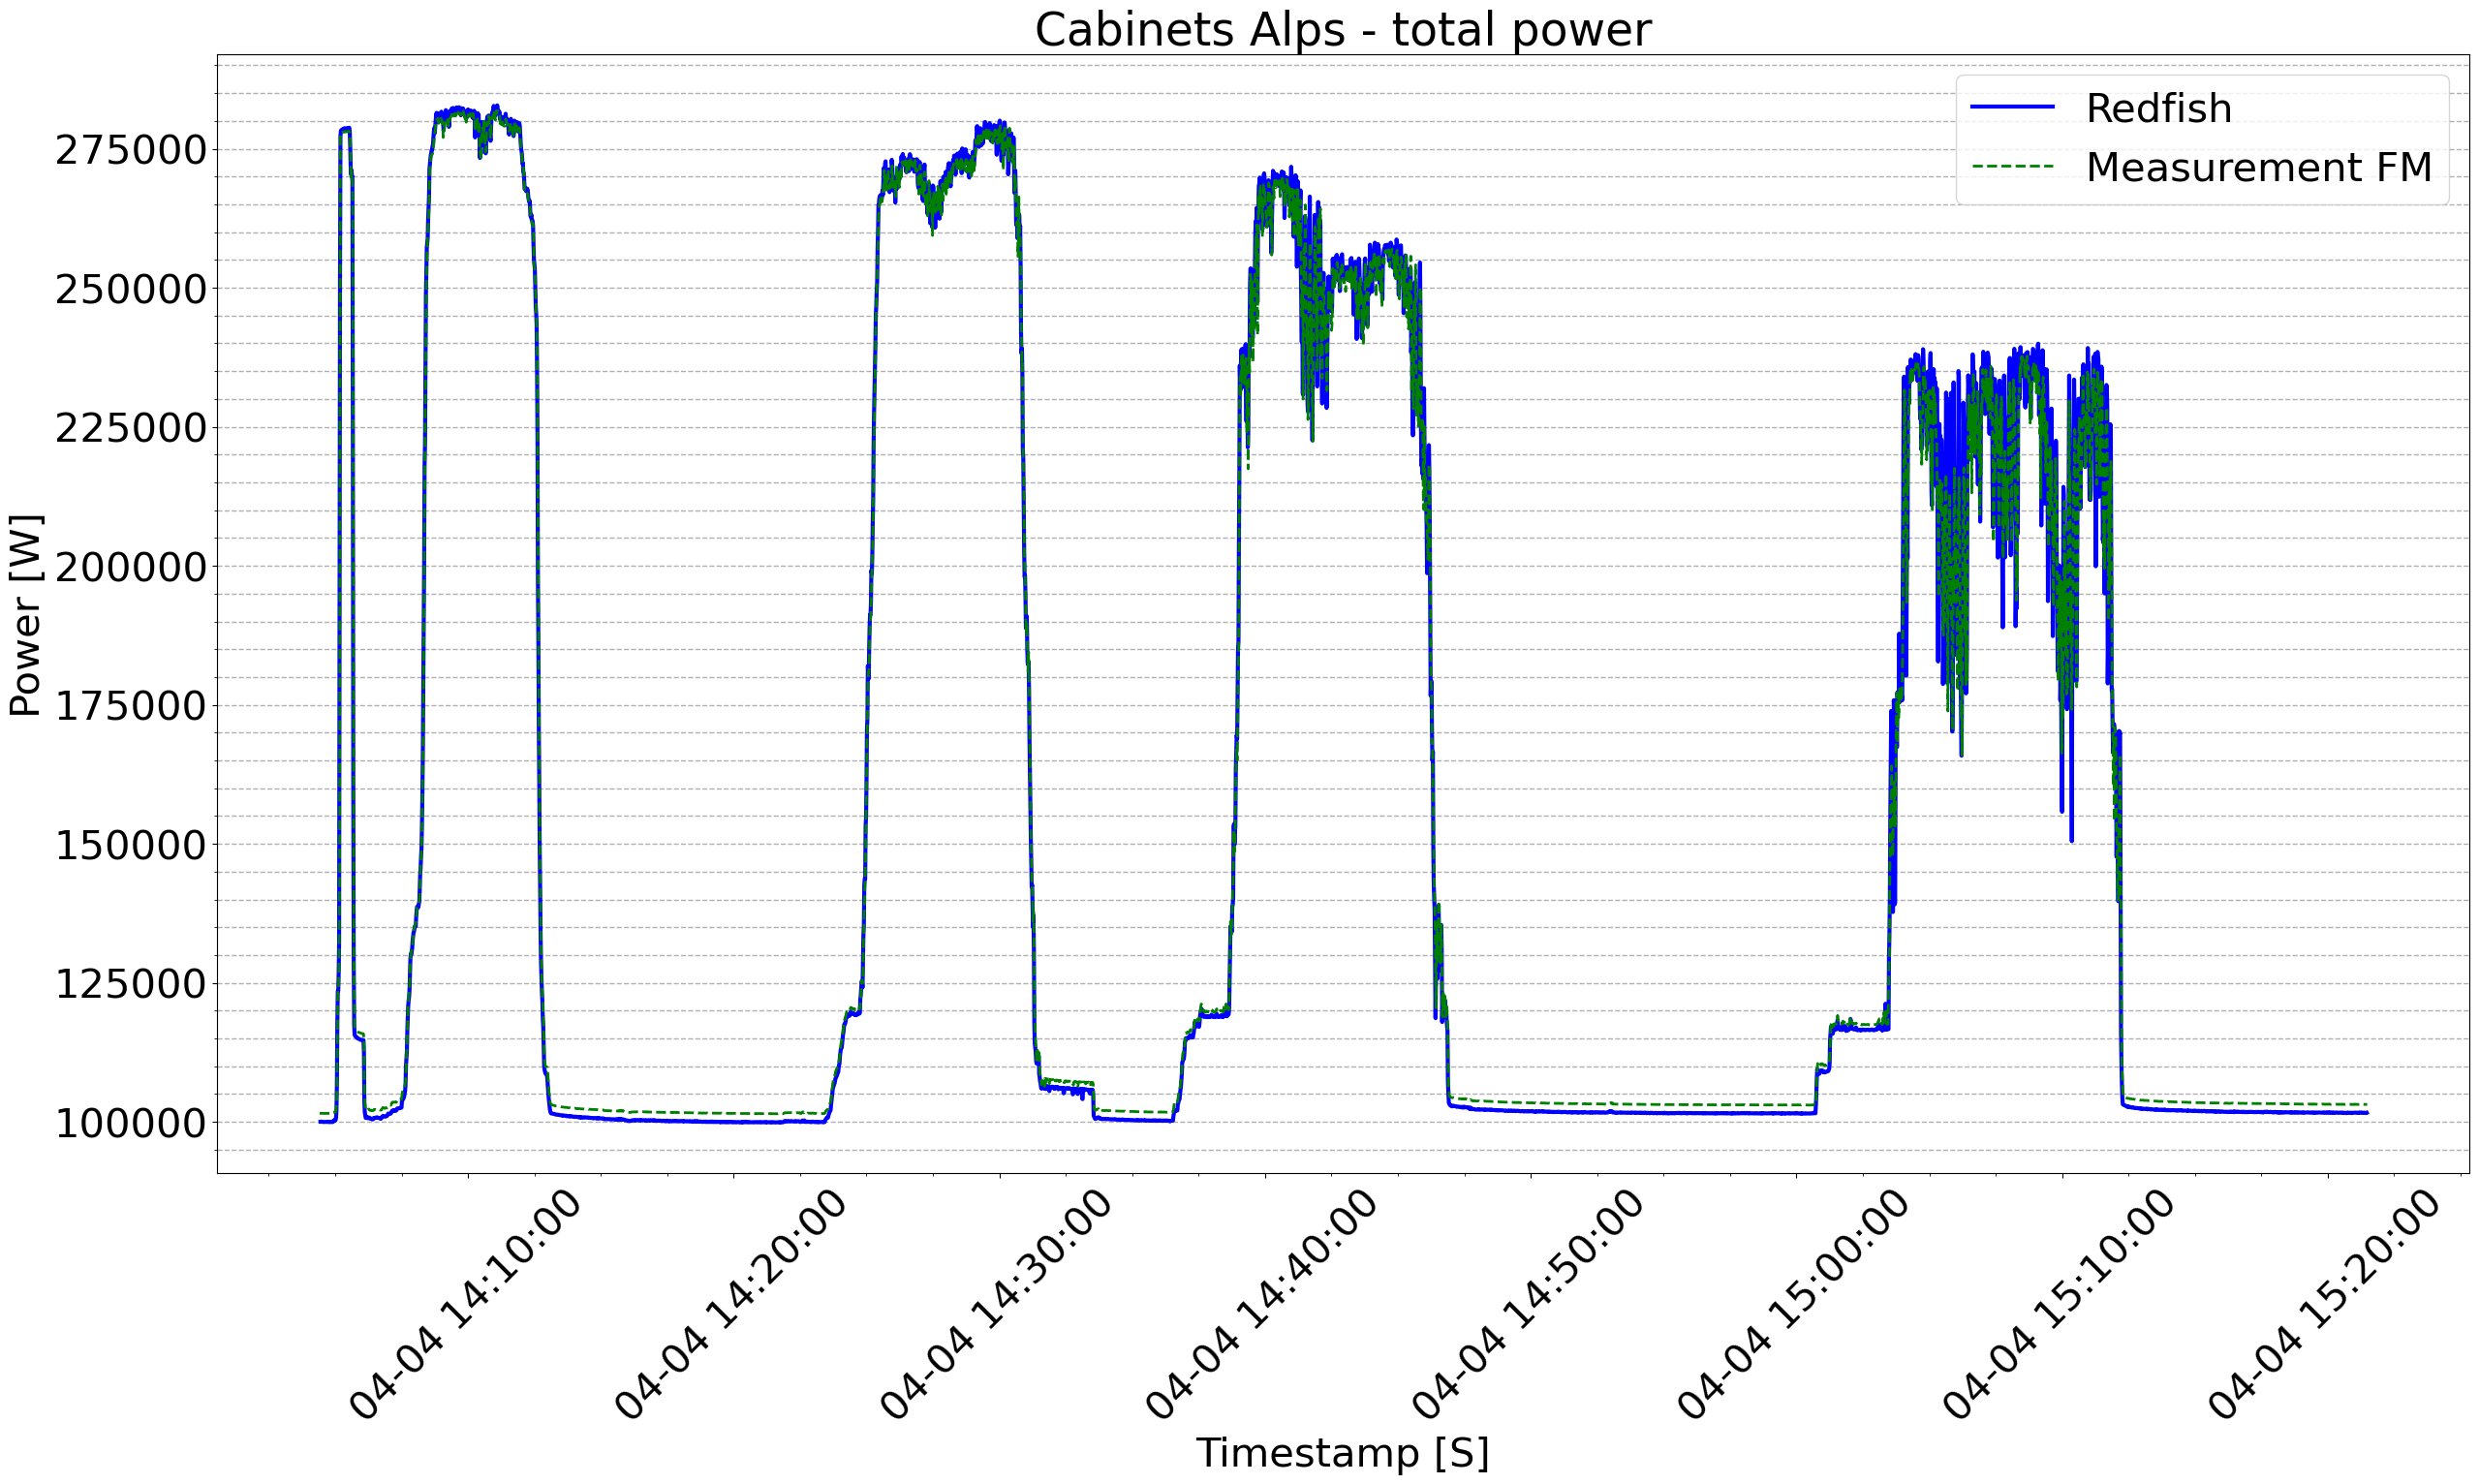

x1102_final_data.202404031349.dwdi.csv


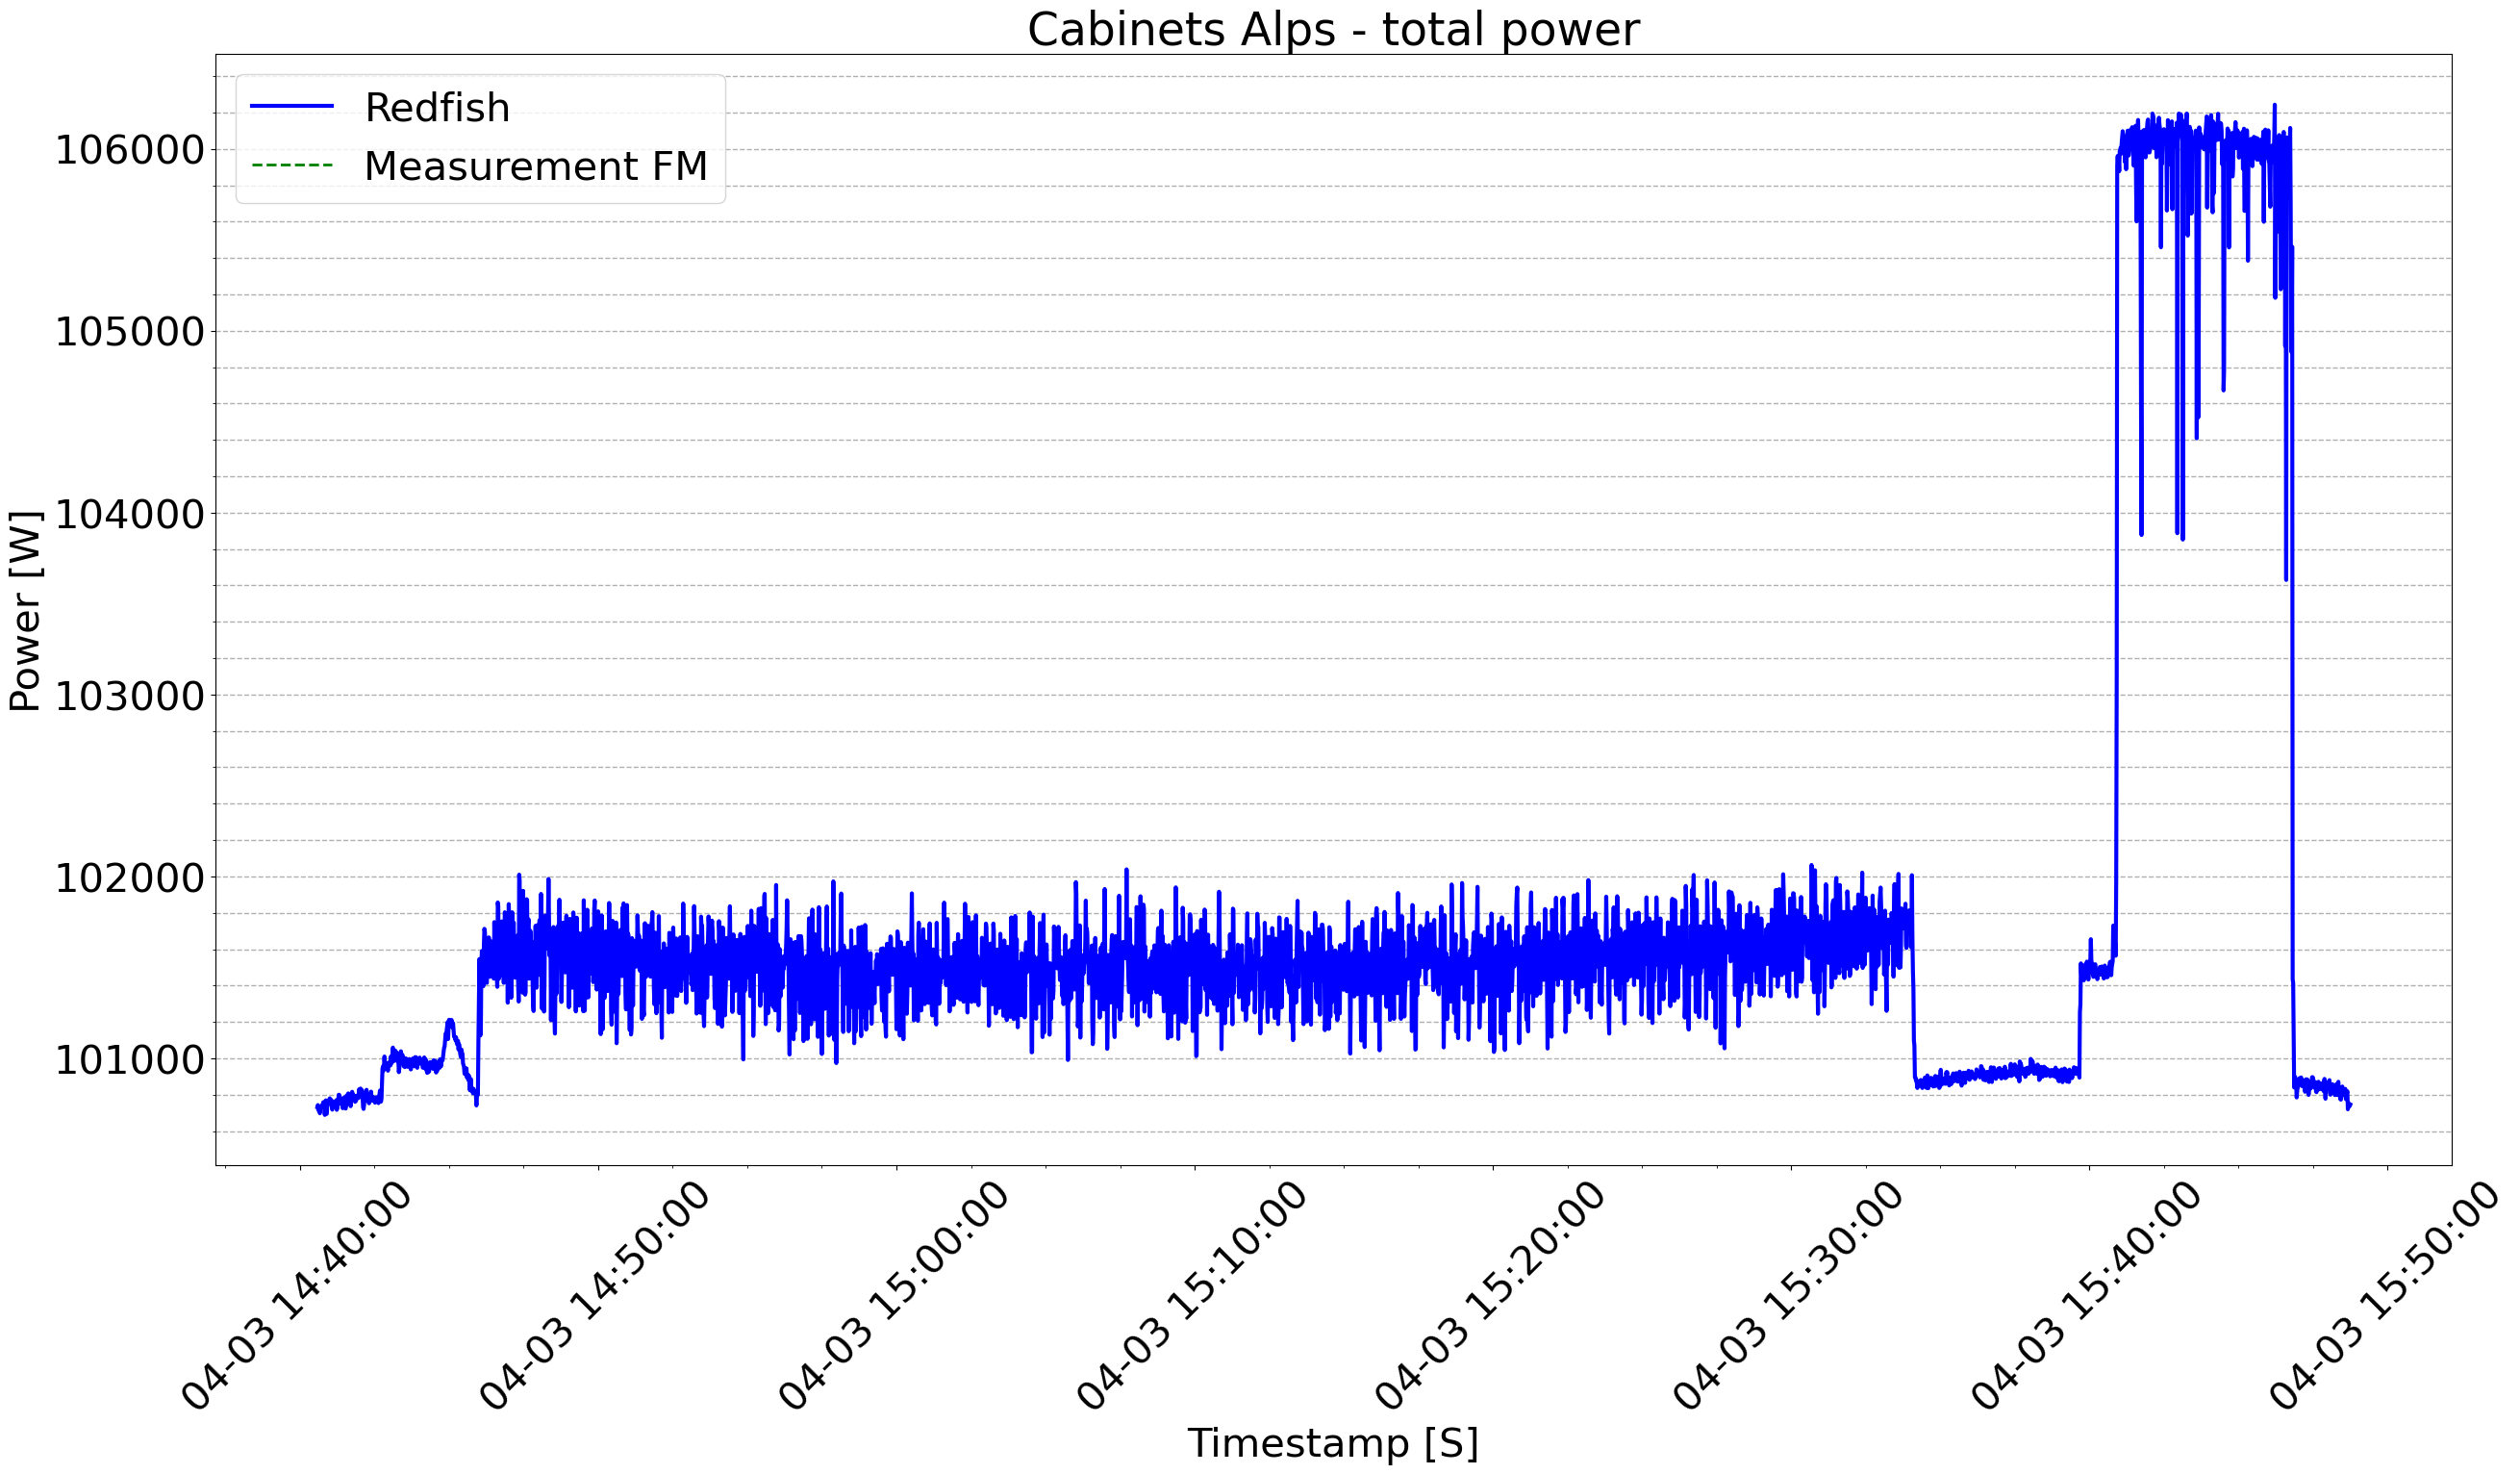

x1102_final_data.202404030921.dwdi.csv


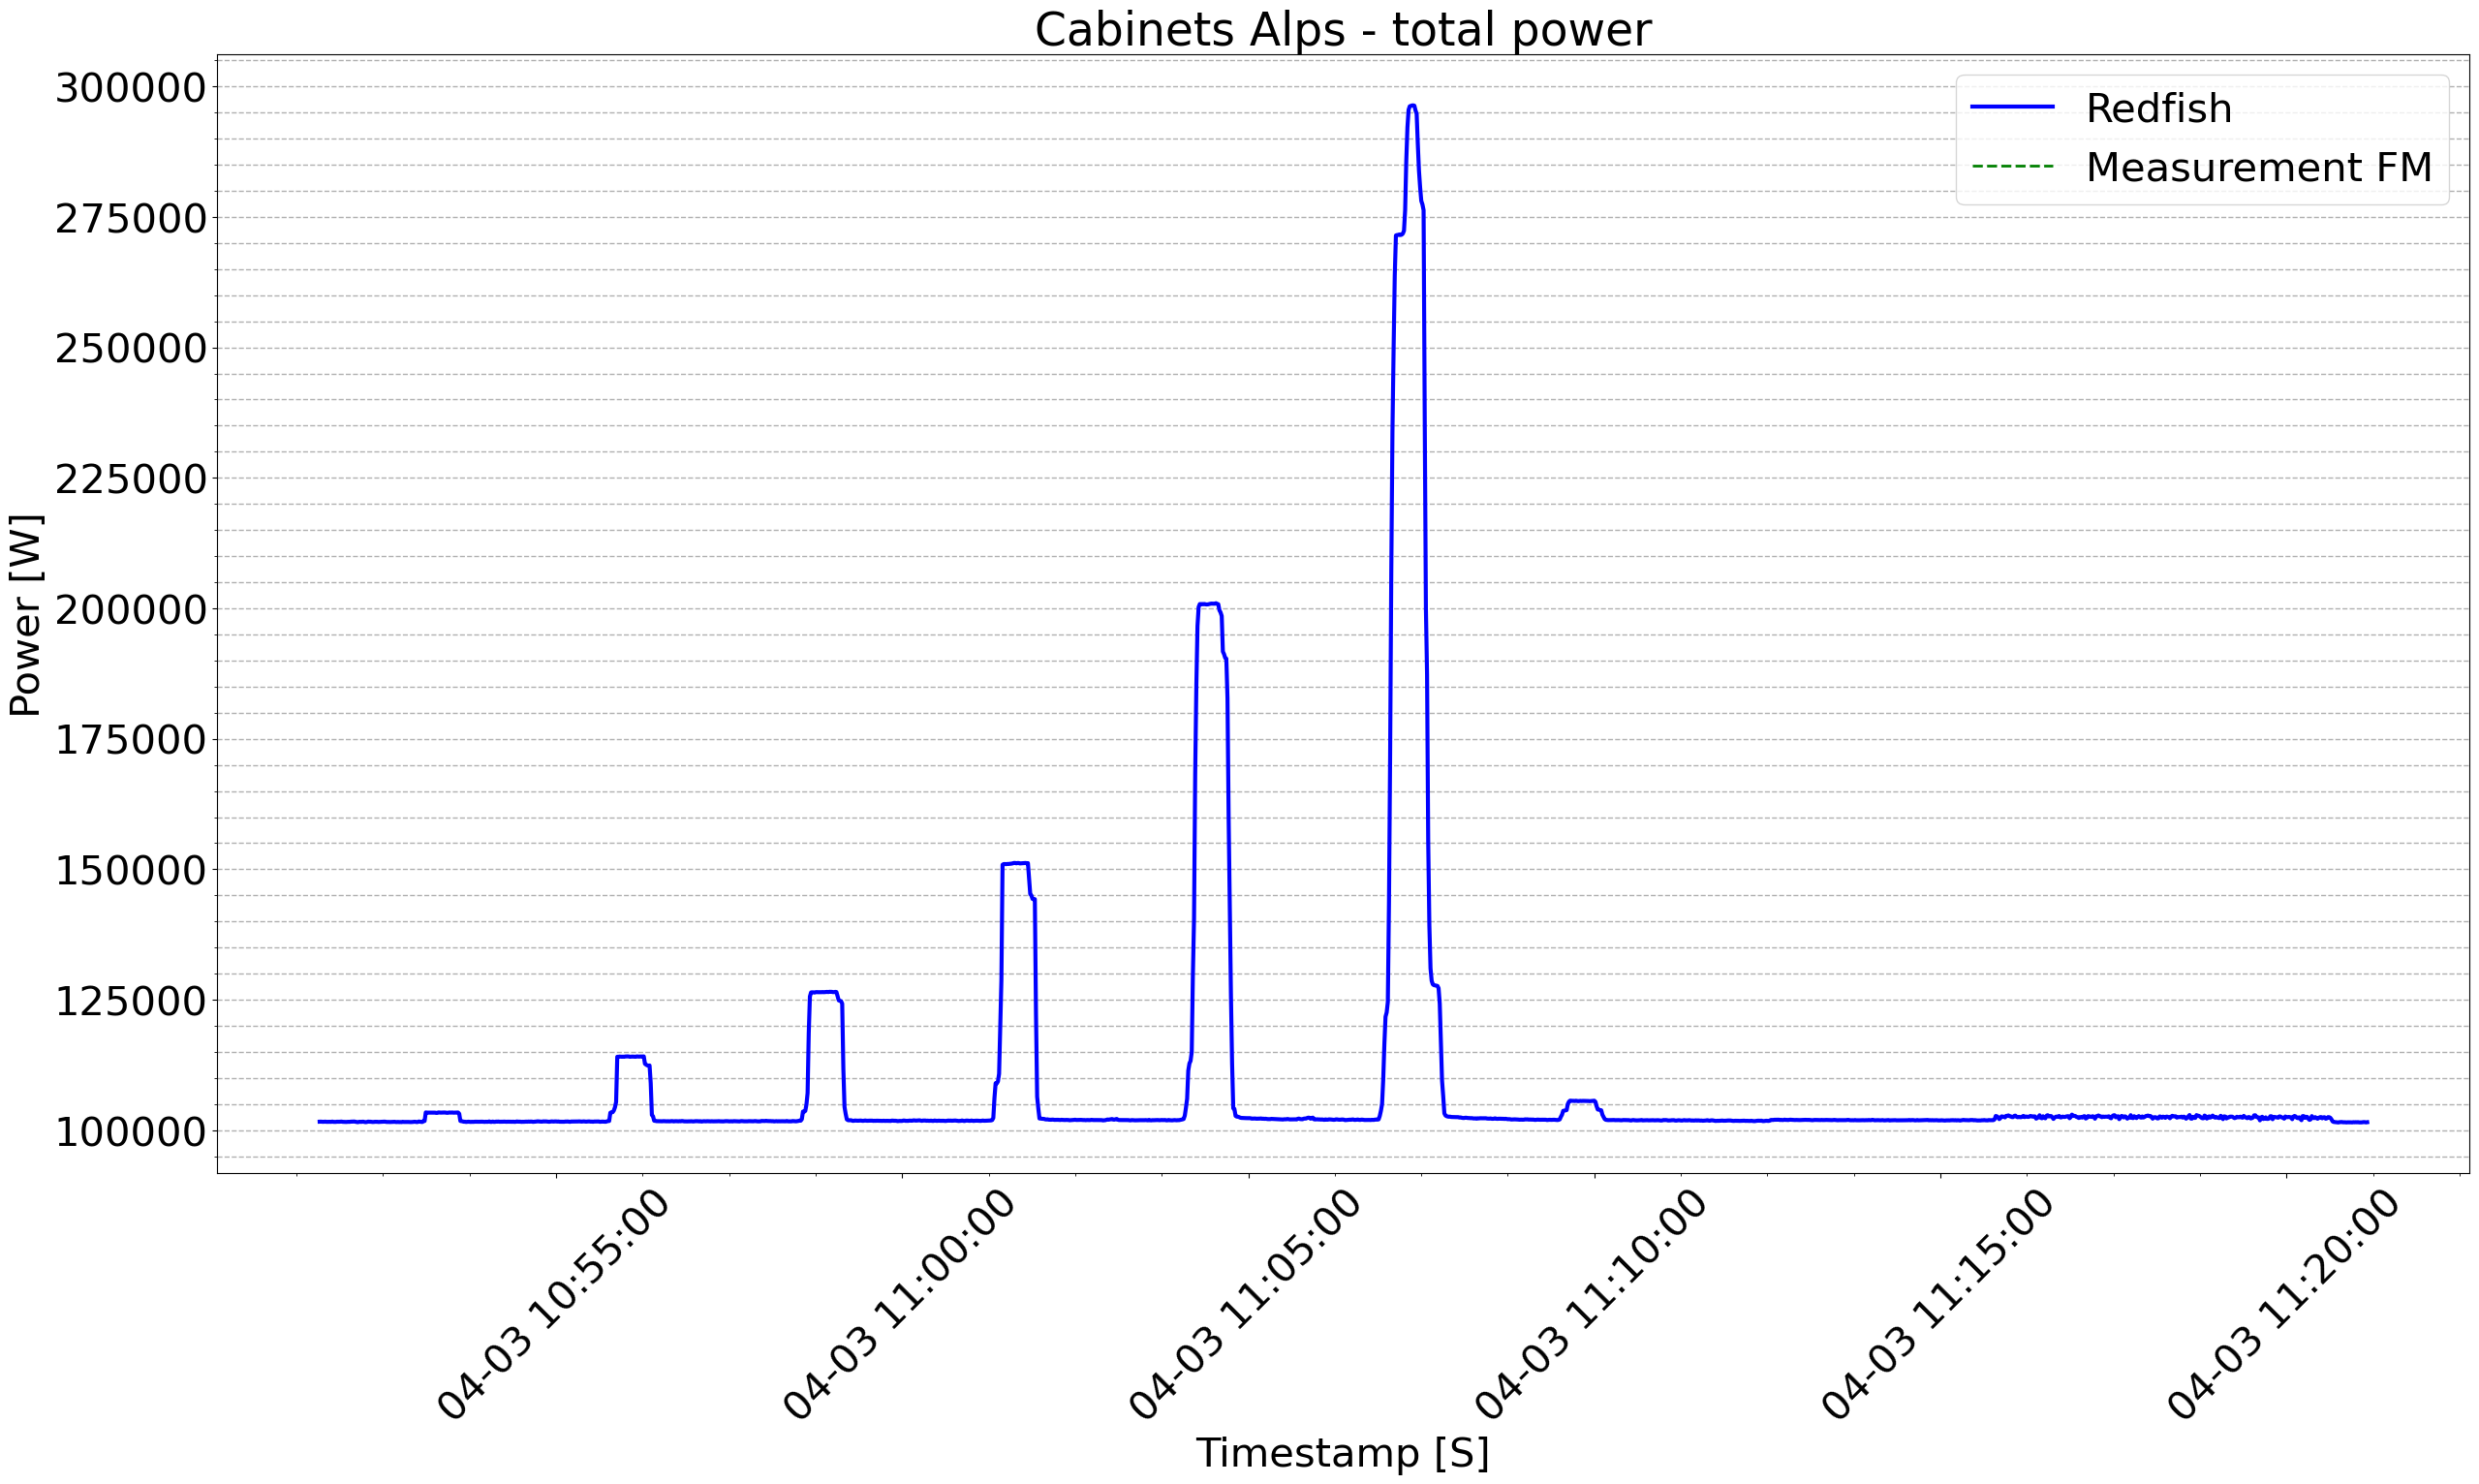

x1102_final_data.202404030850.dwdi.csv


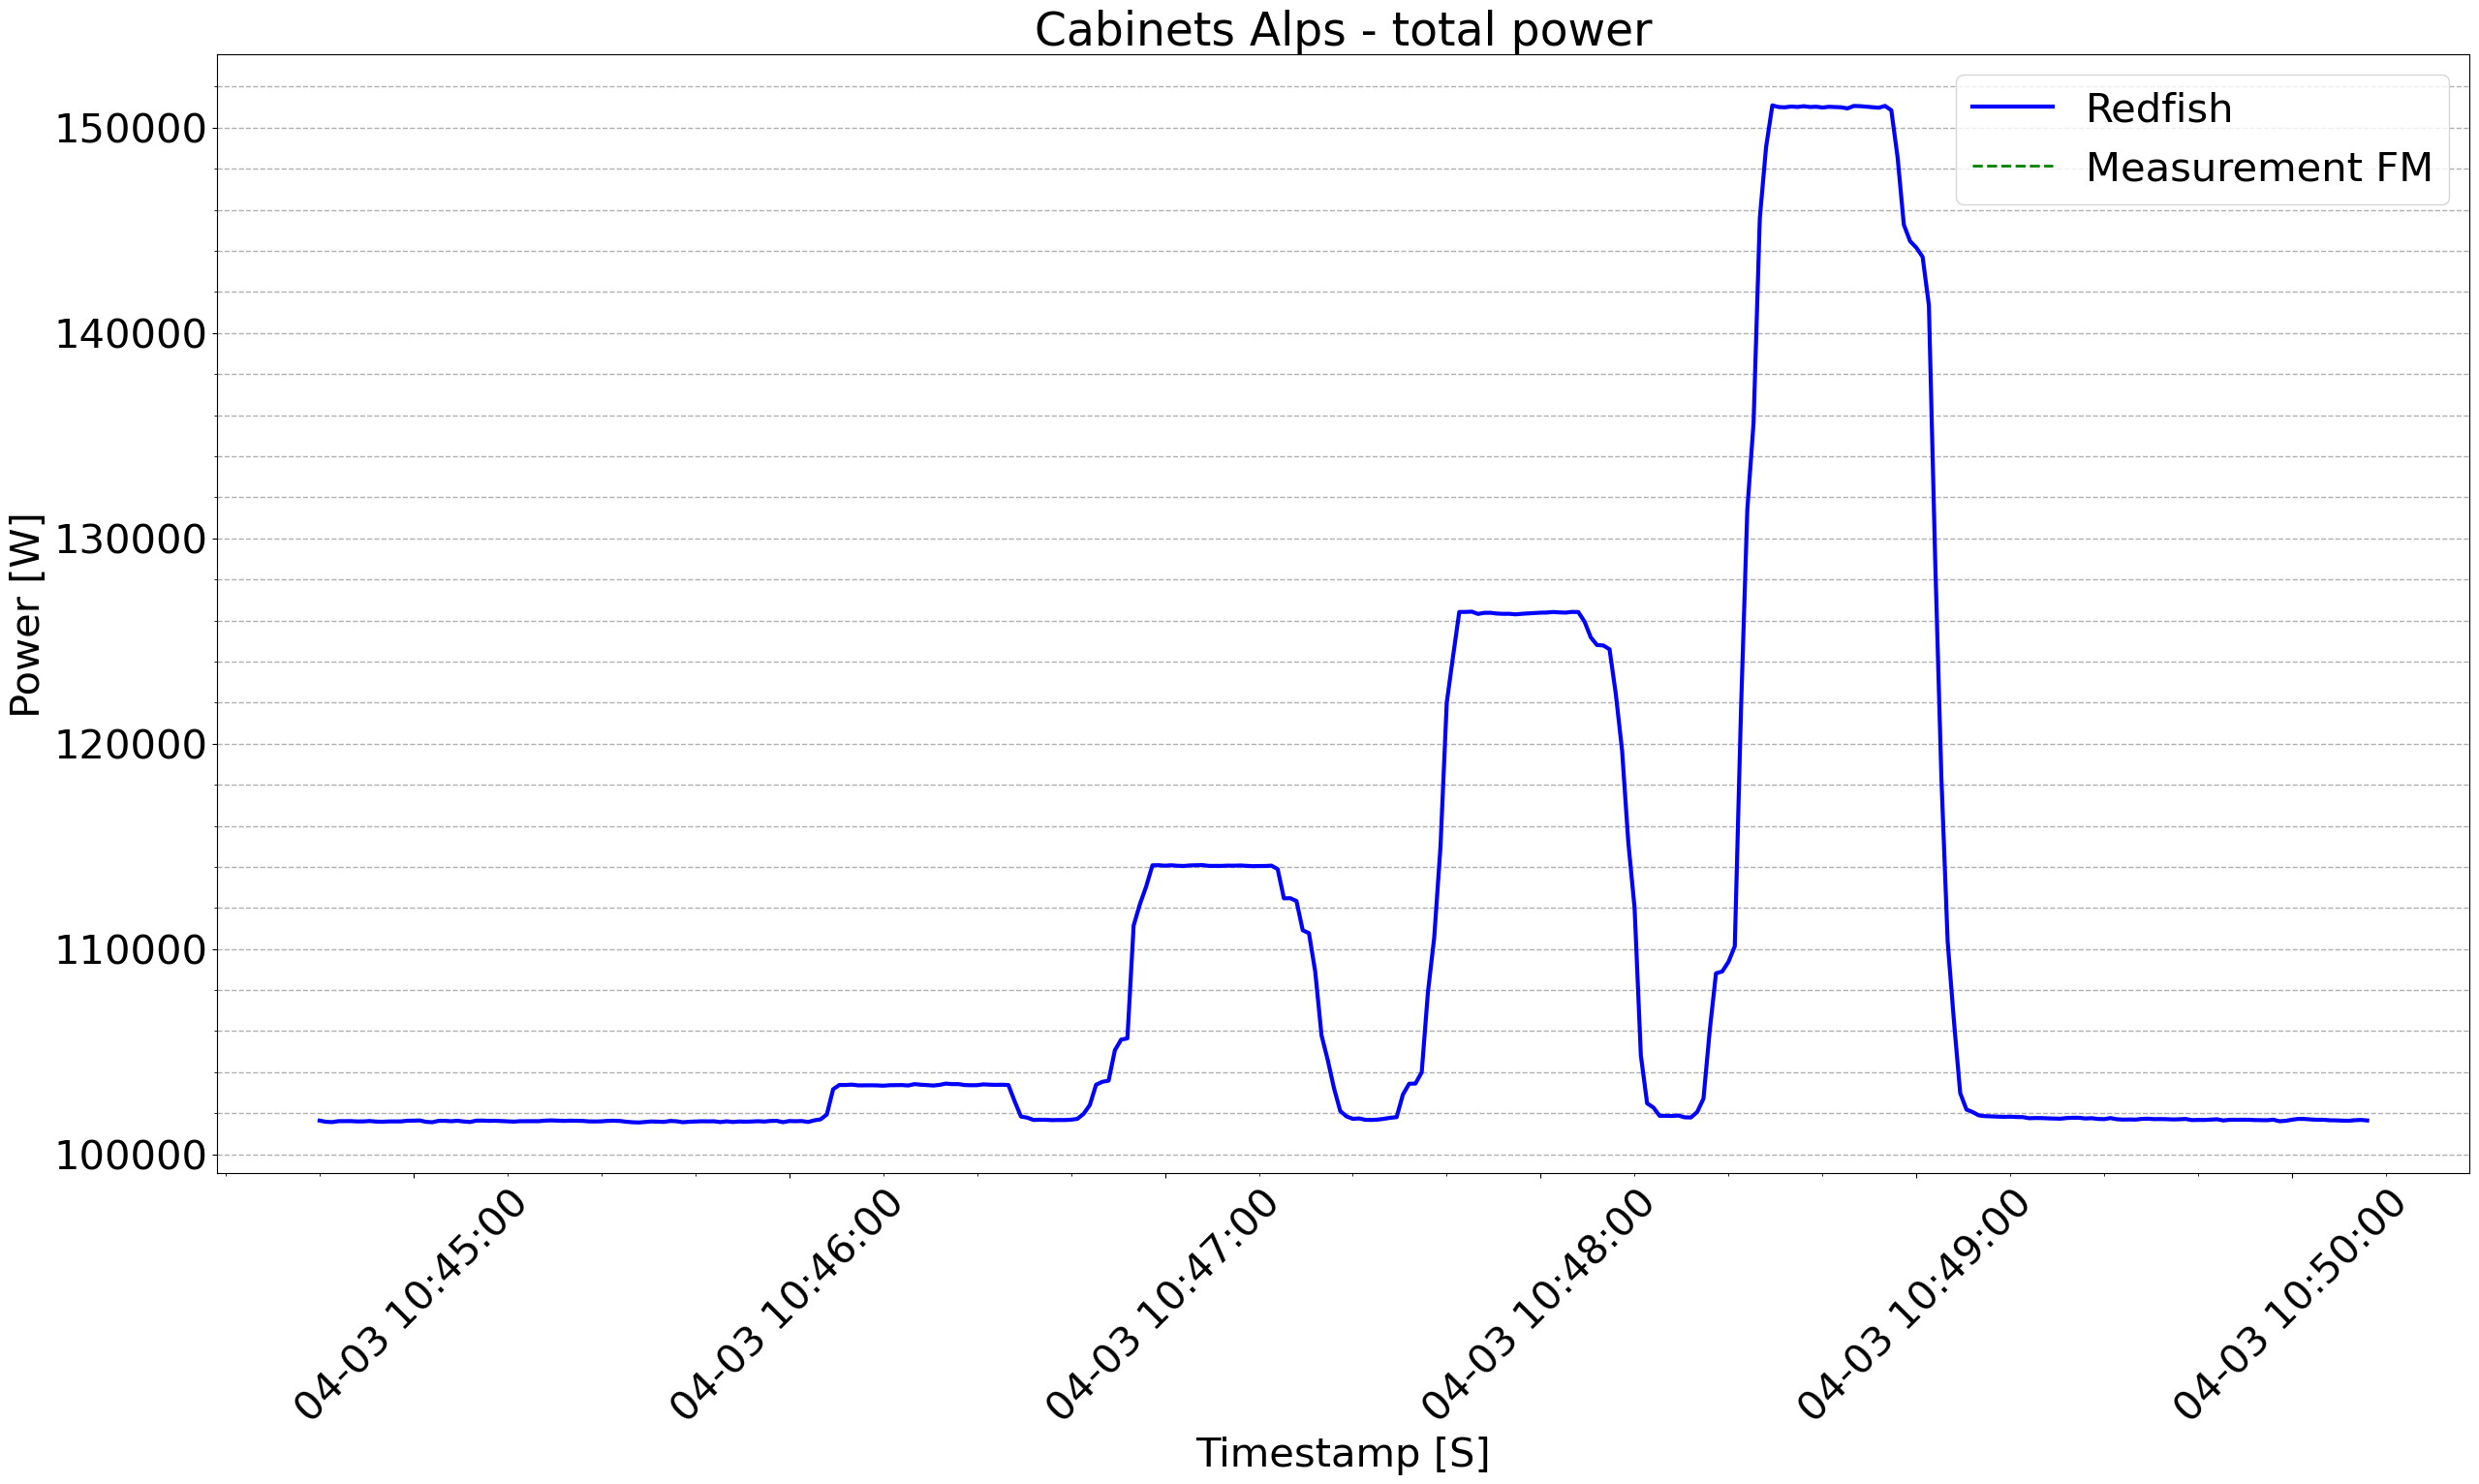

x1102_final_data.202404060133.dwdi.csv


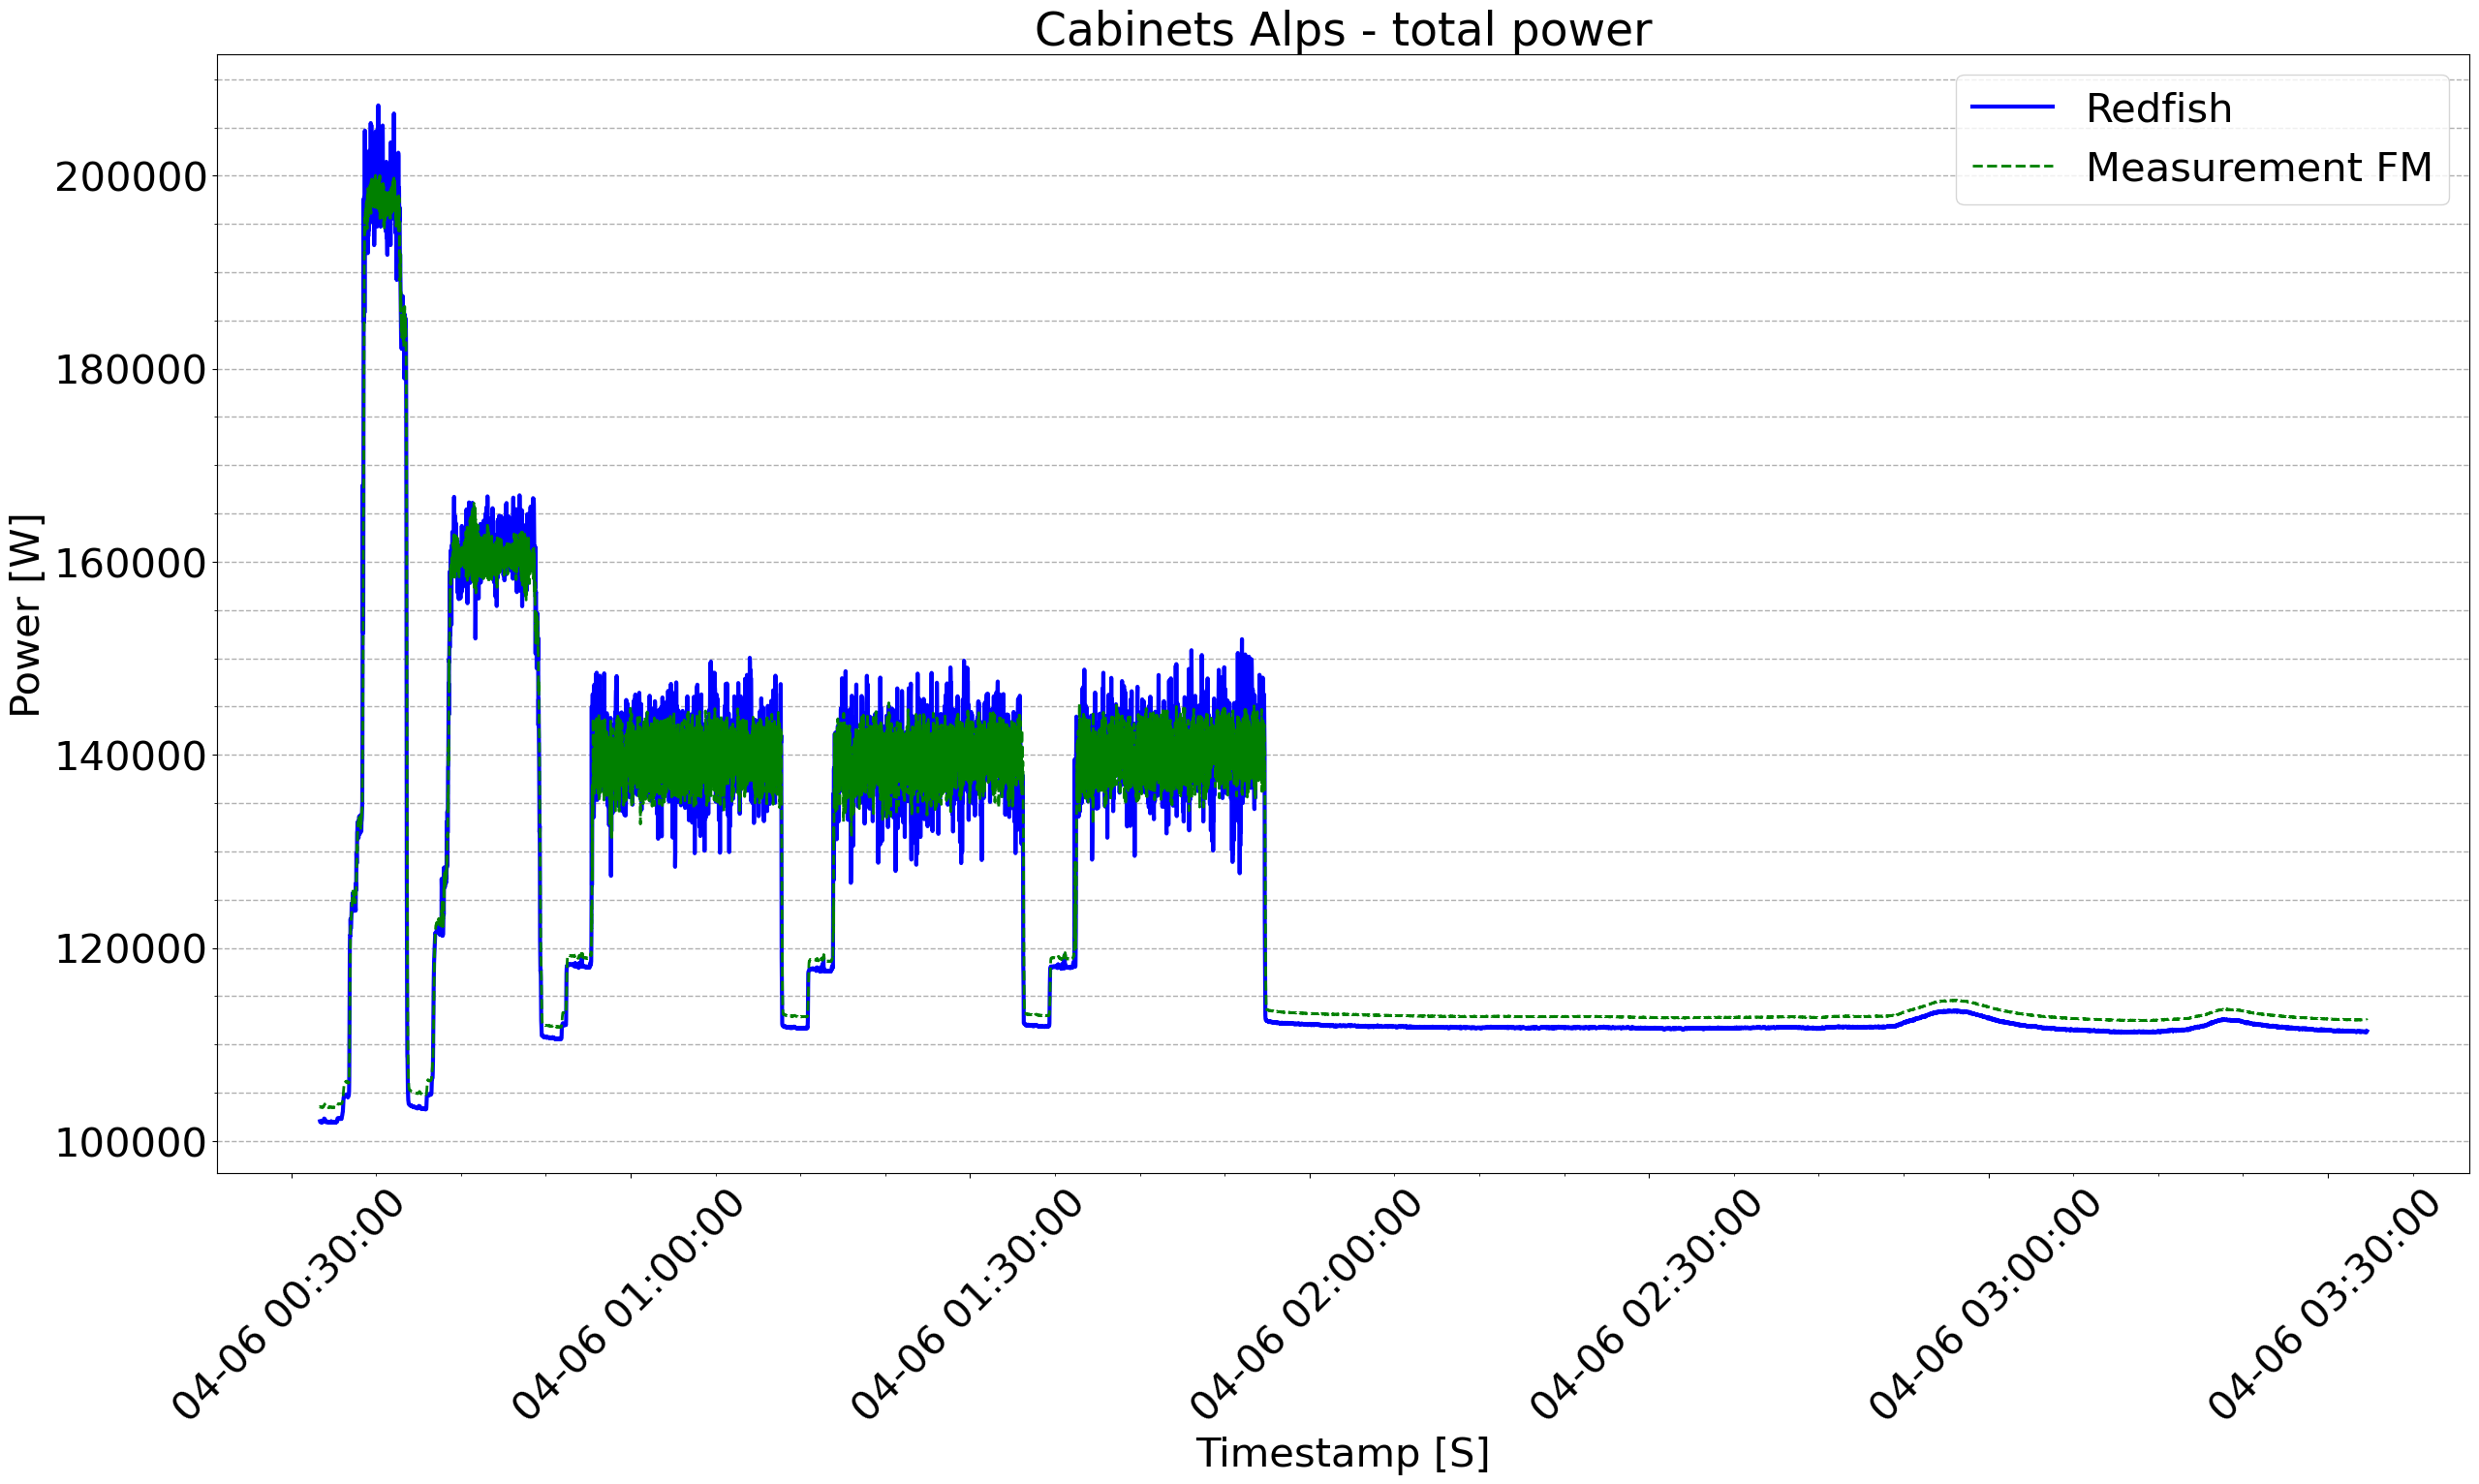

x1102_final_data.202404021455.dwdi.csv


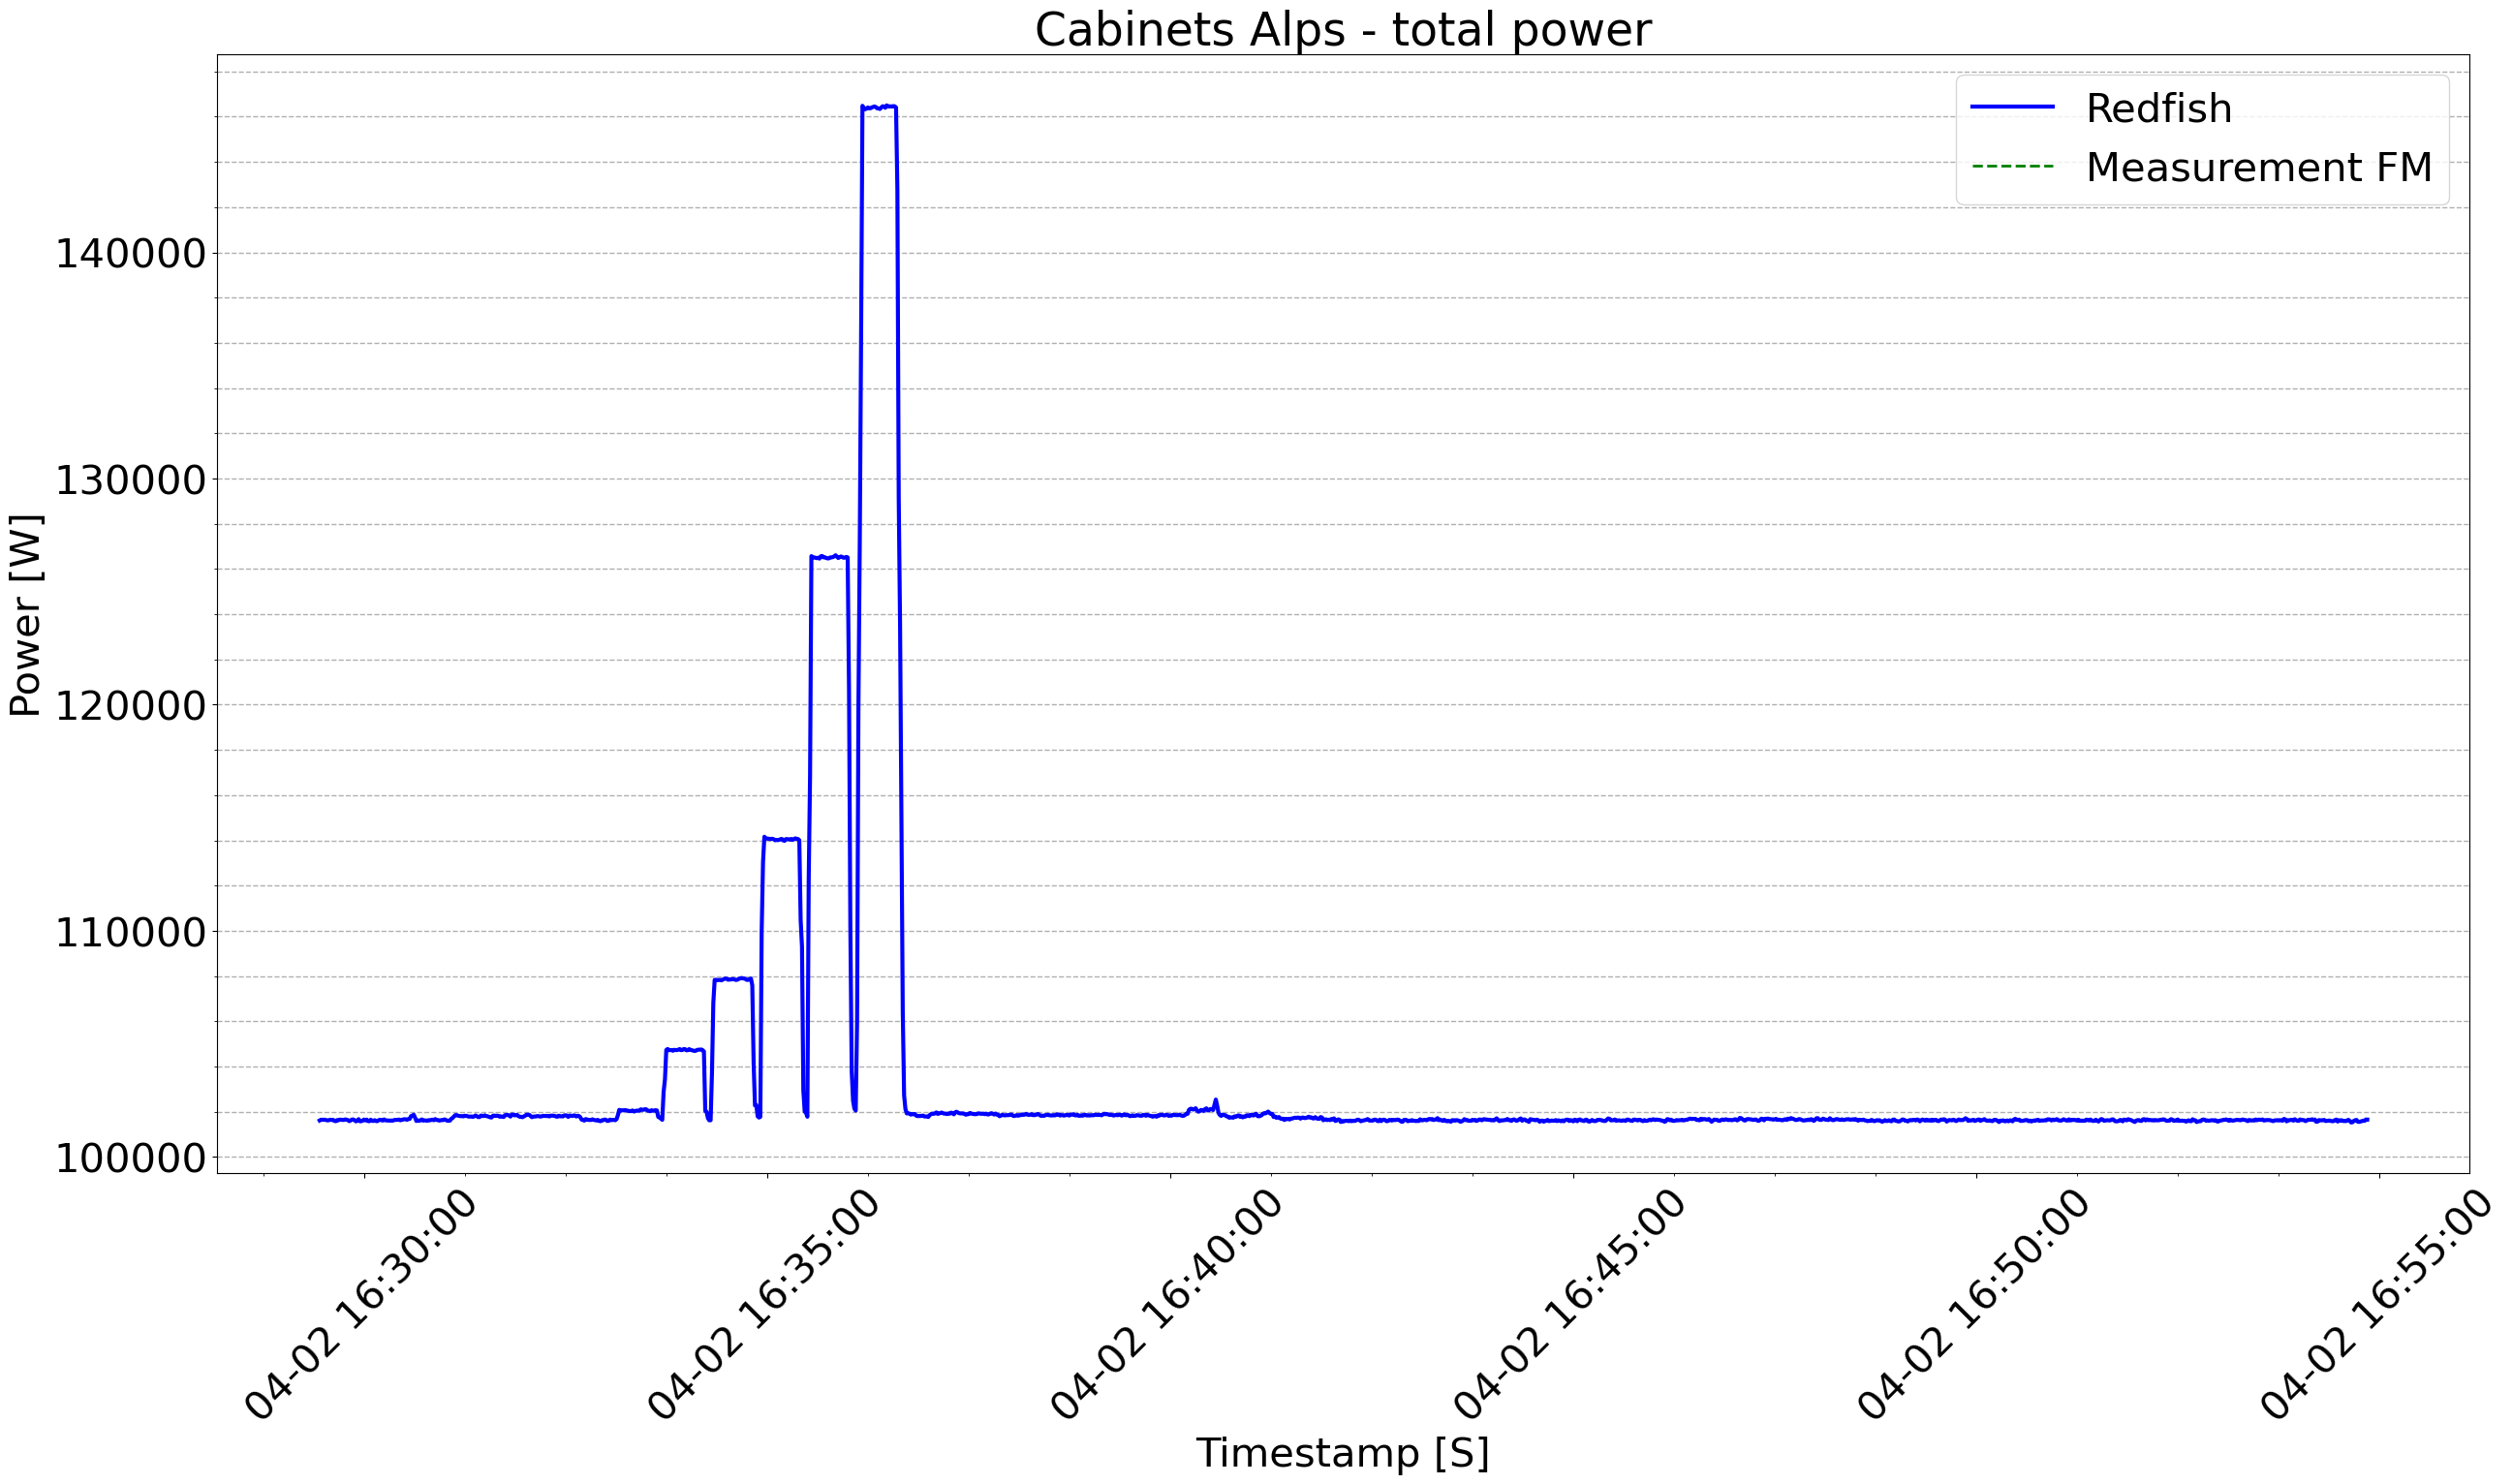

x1102_final_data.202404050922.dwdi.csv


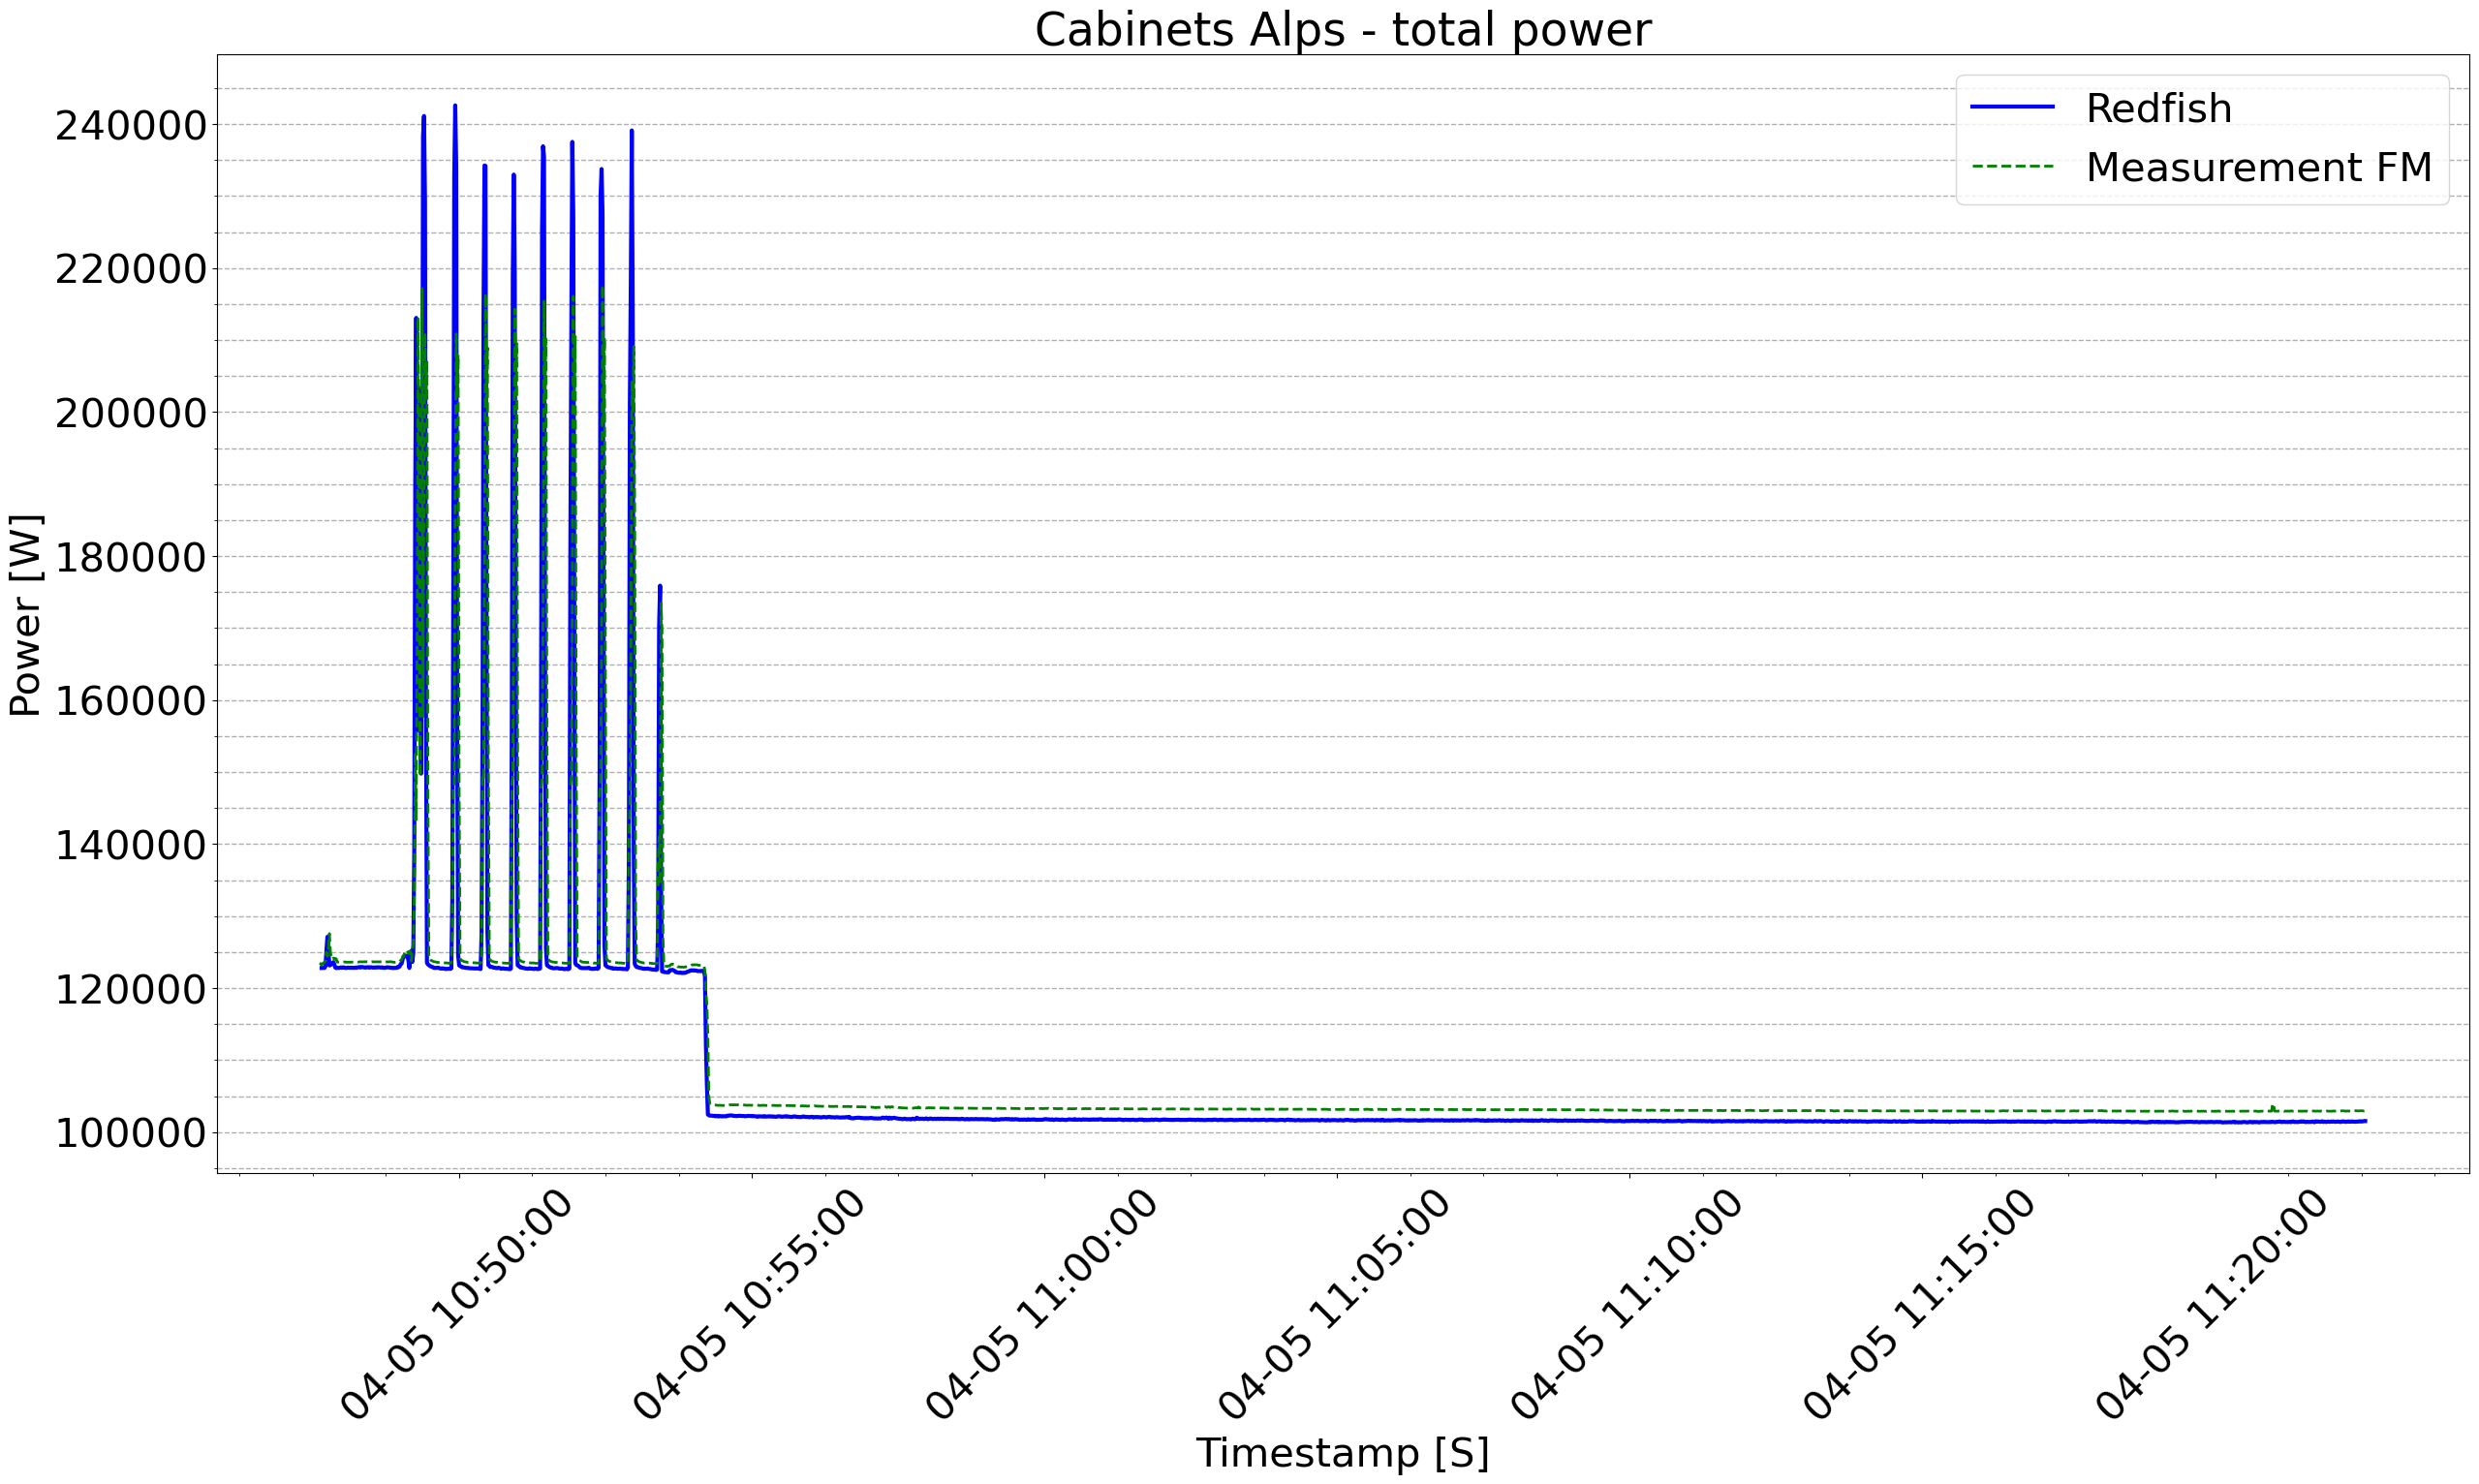

x1102_final_data.202404061836.dwdi.csv


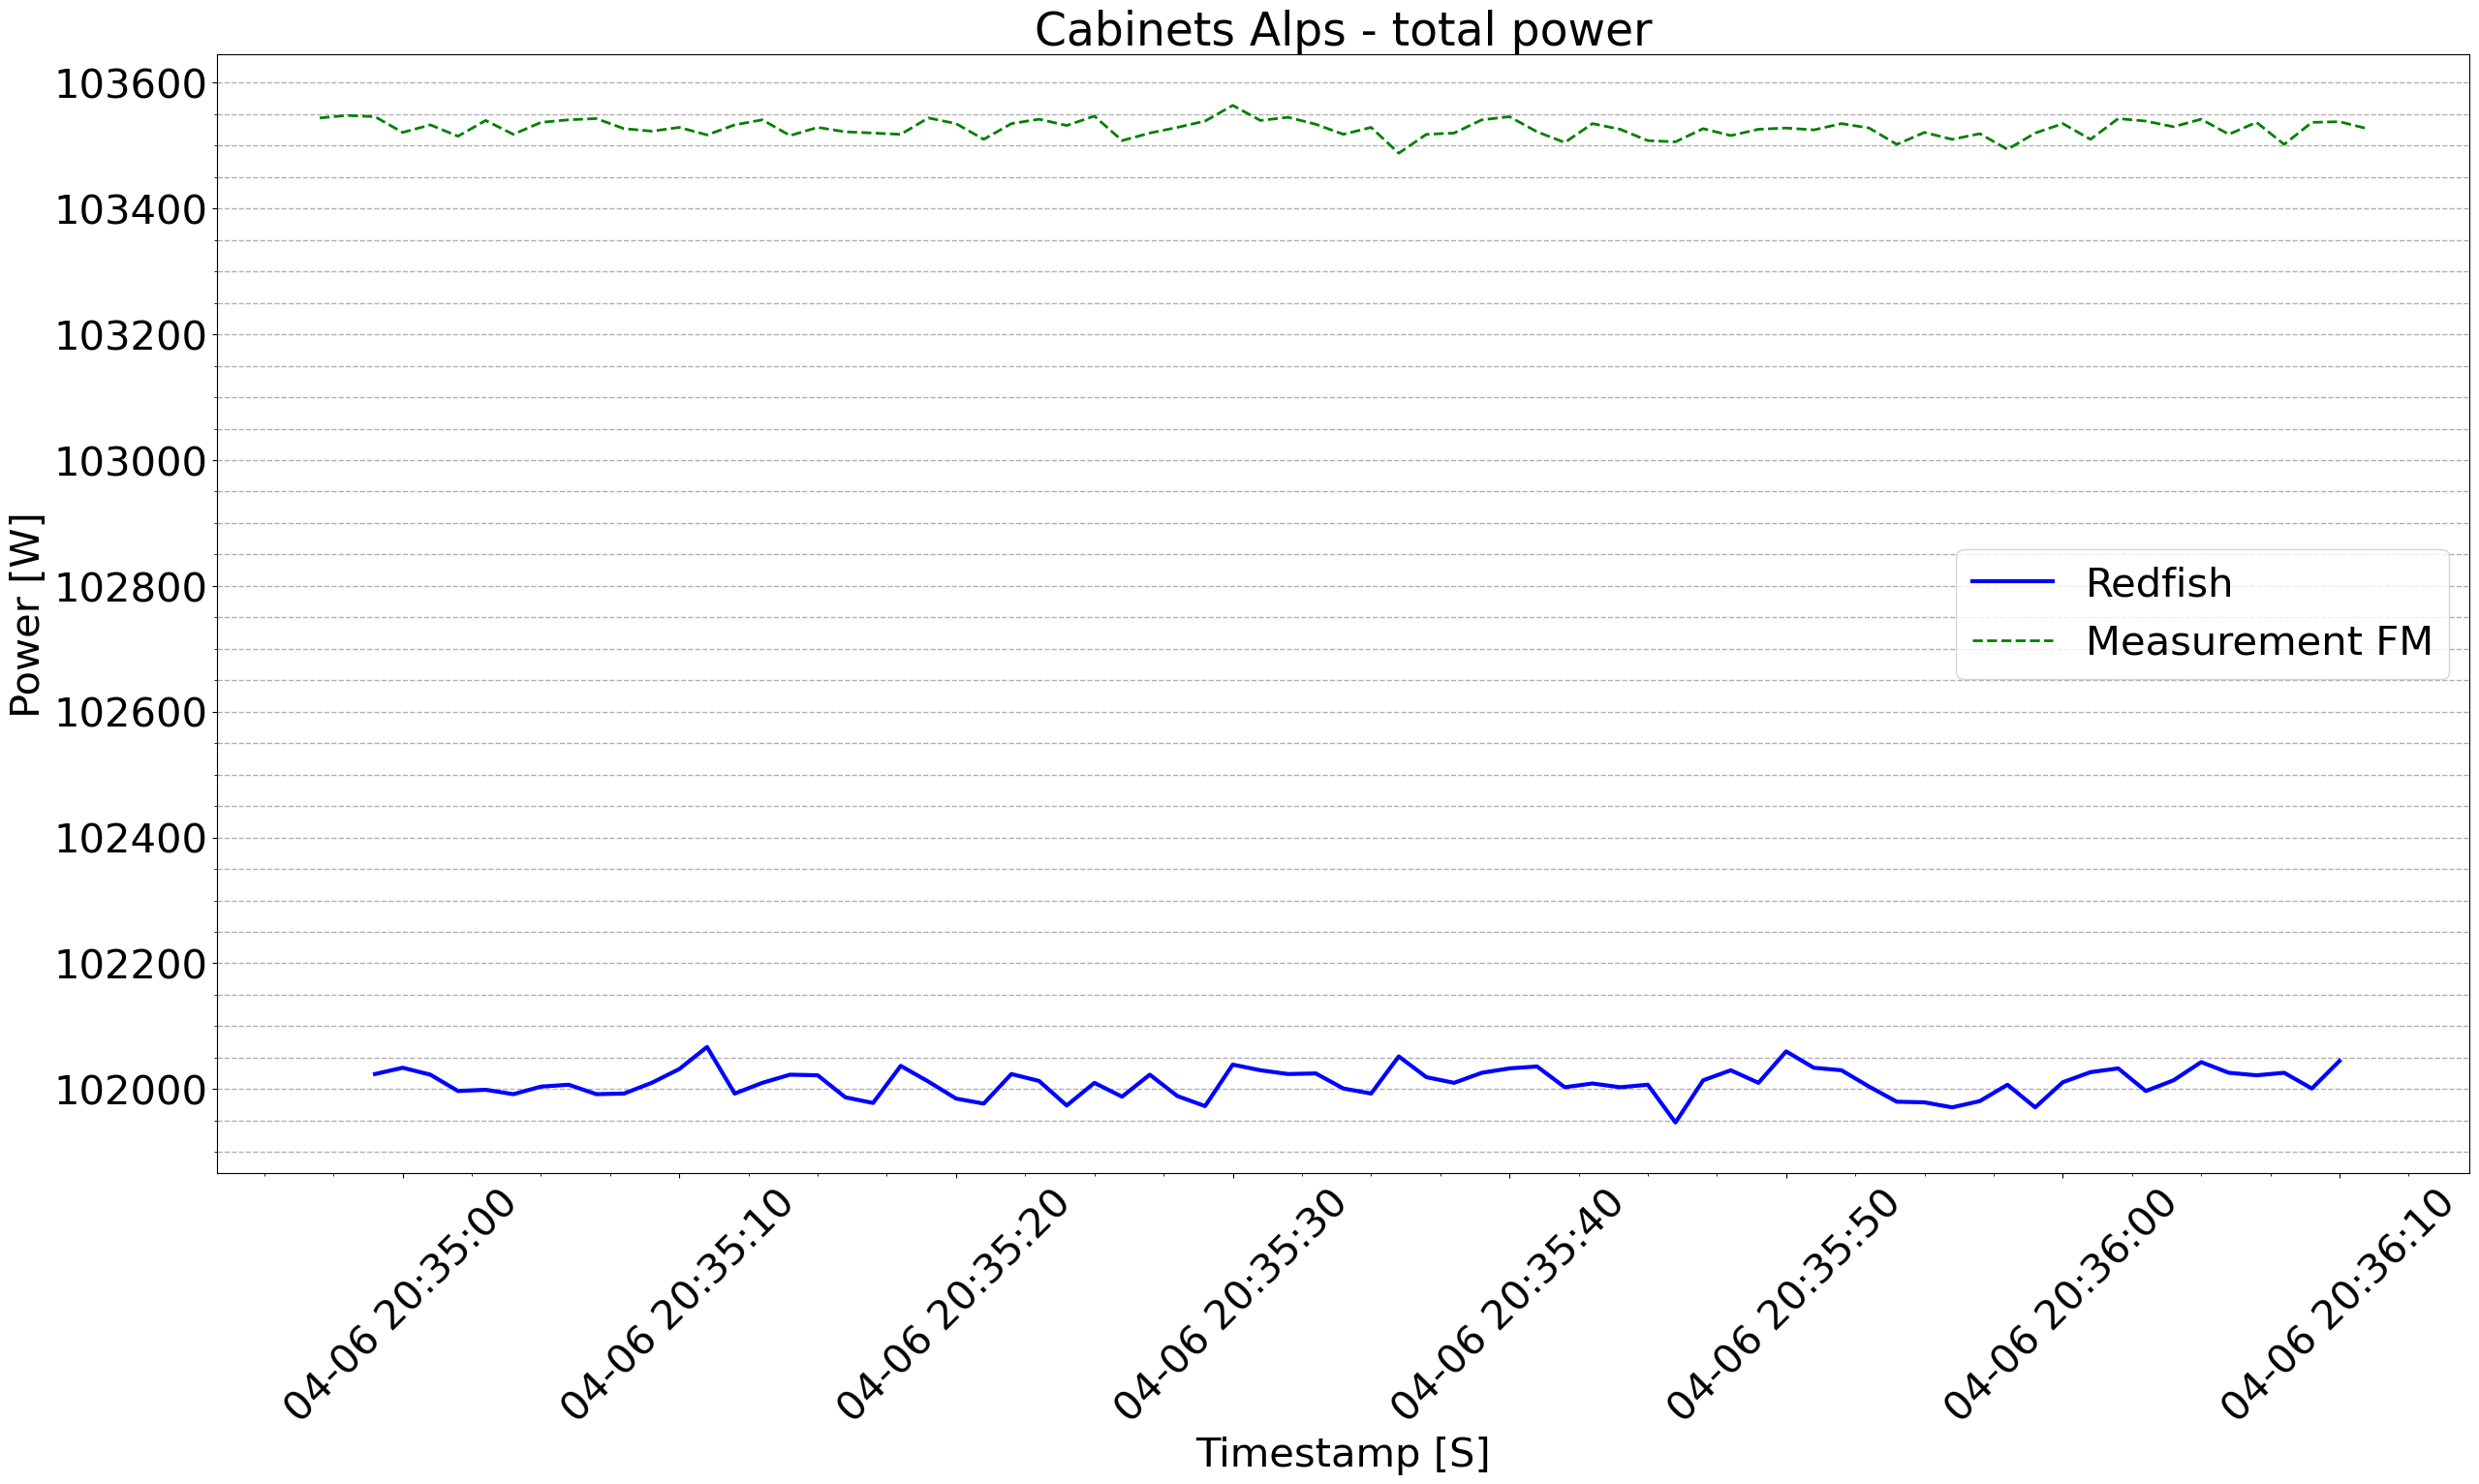

x1102_final_data.202404051655.dwdi.csv


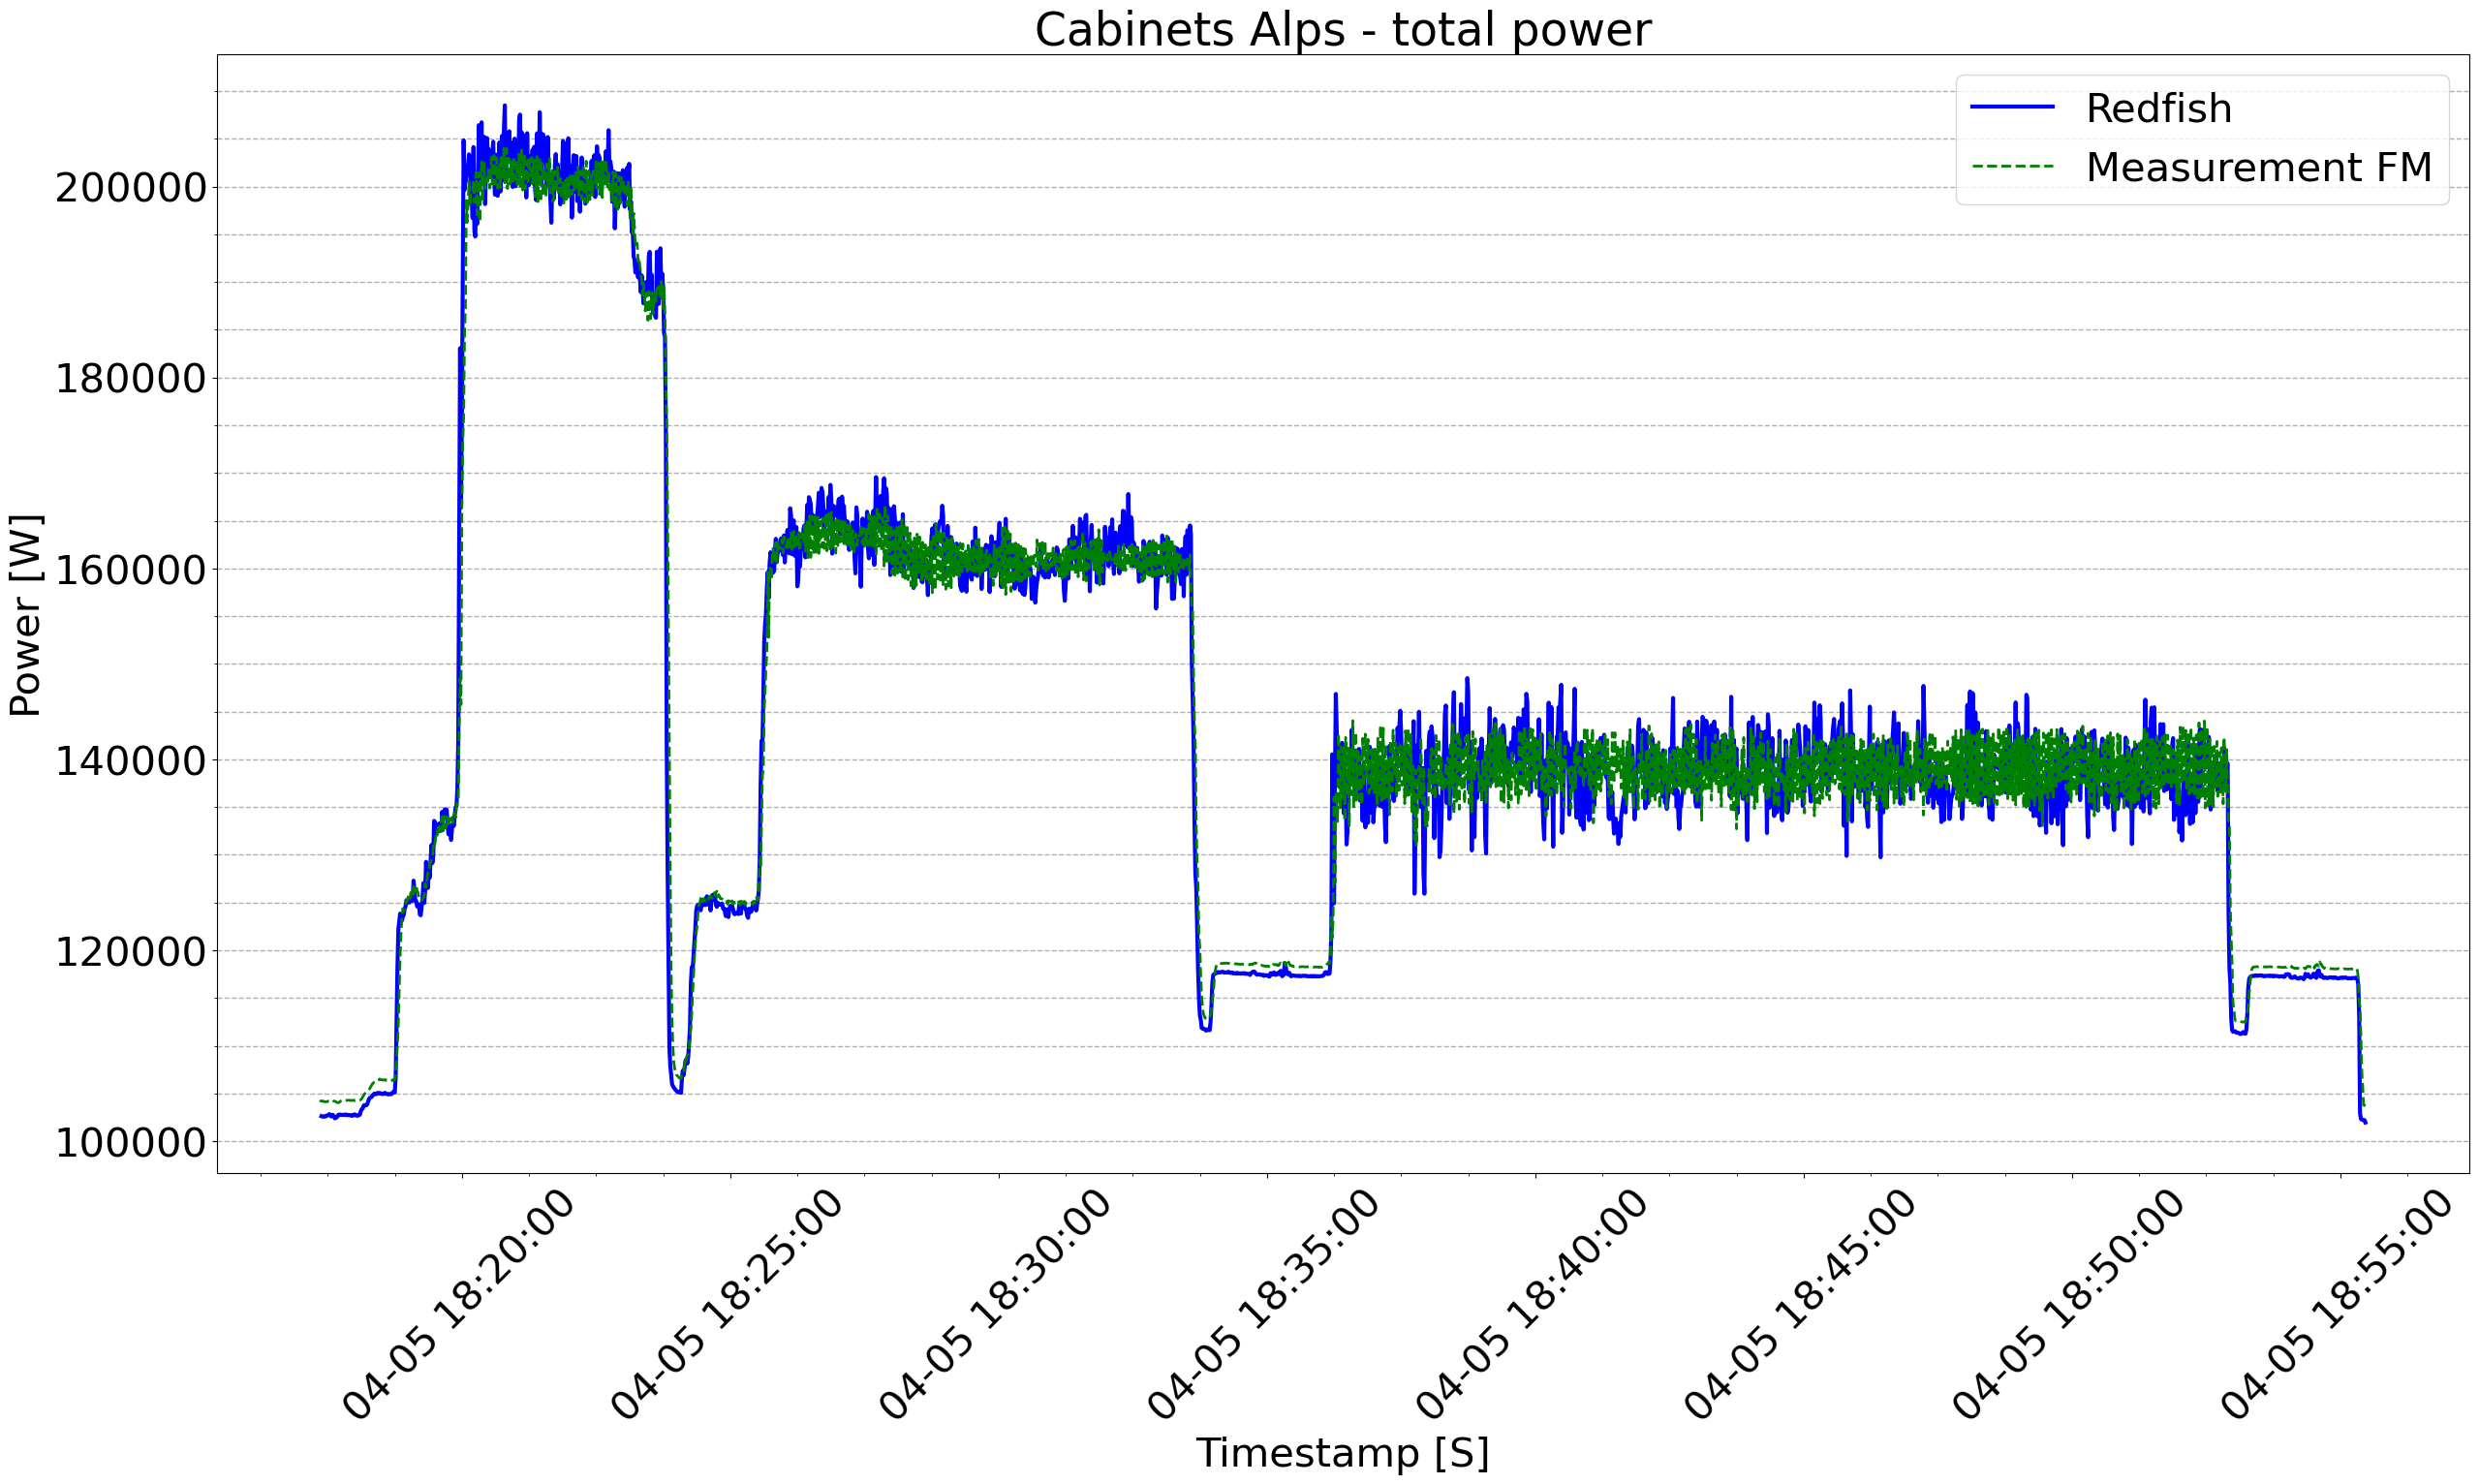

x1102_final_data.202404020834.dwdi.csv


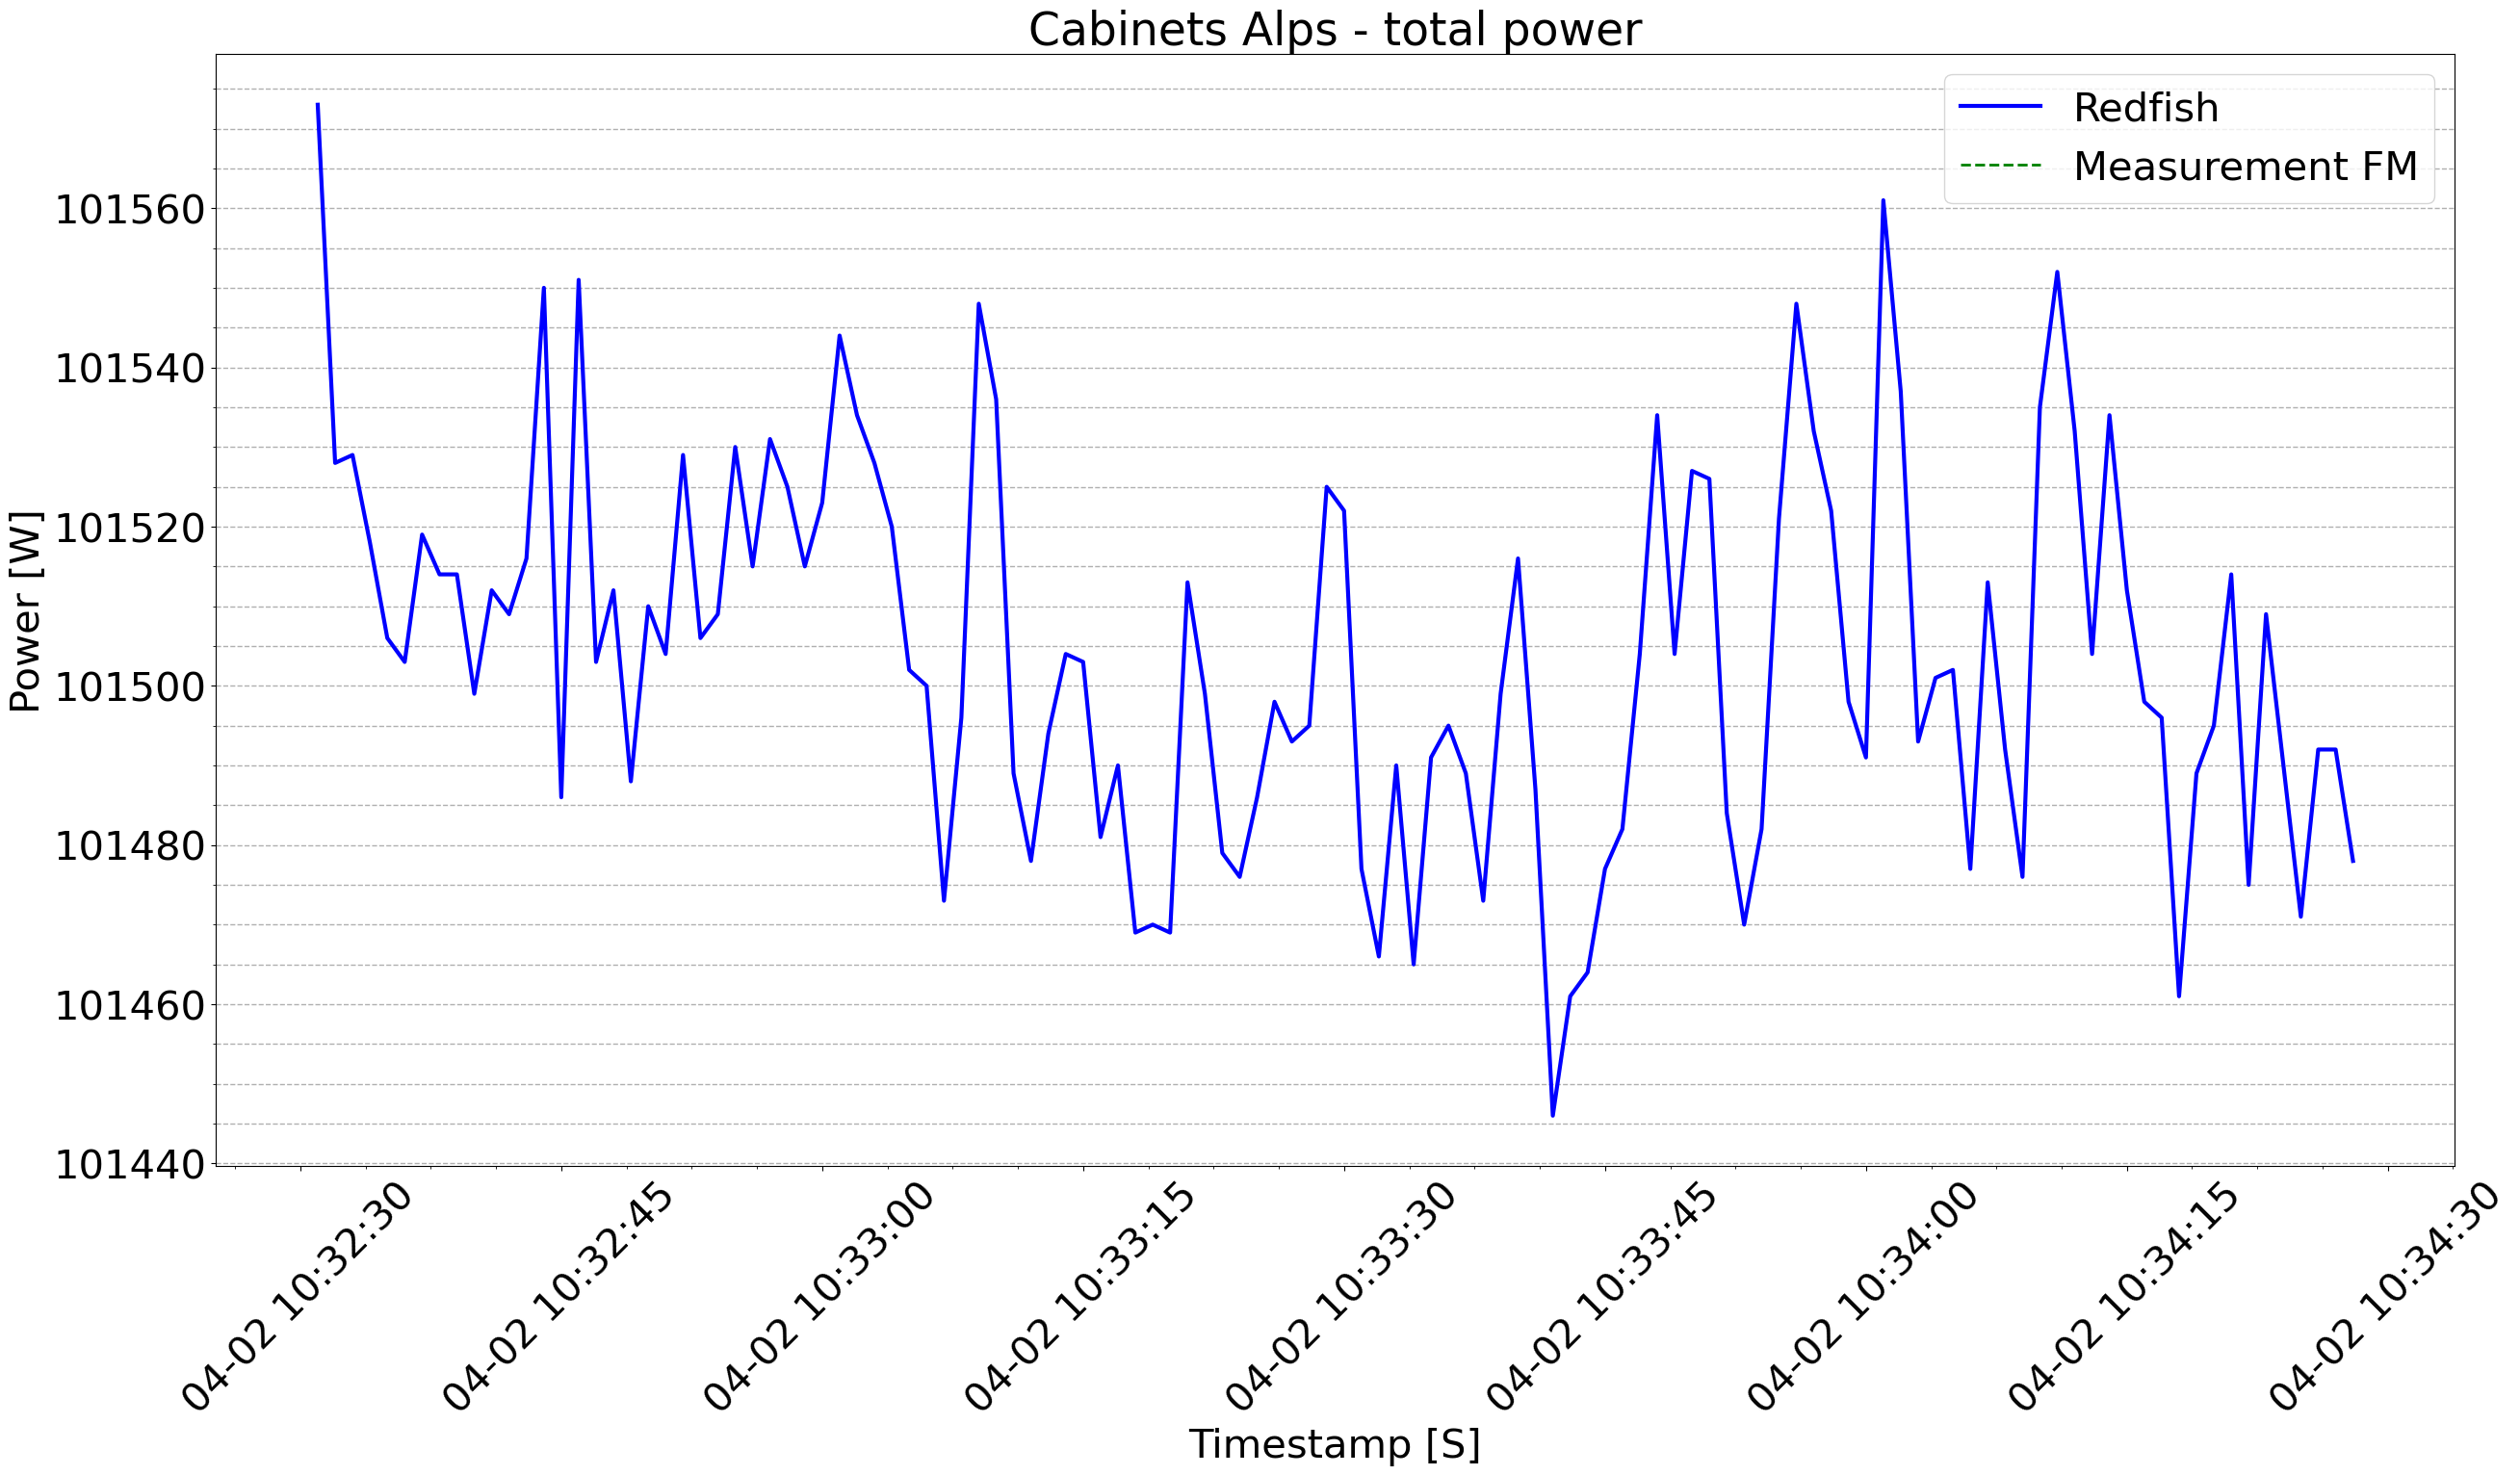

x1102_final_data.202404051041.dwdi.csv


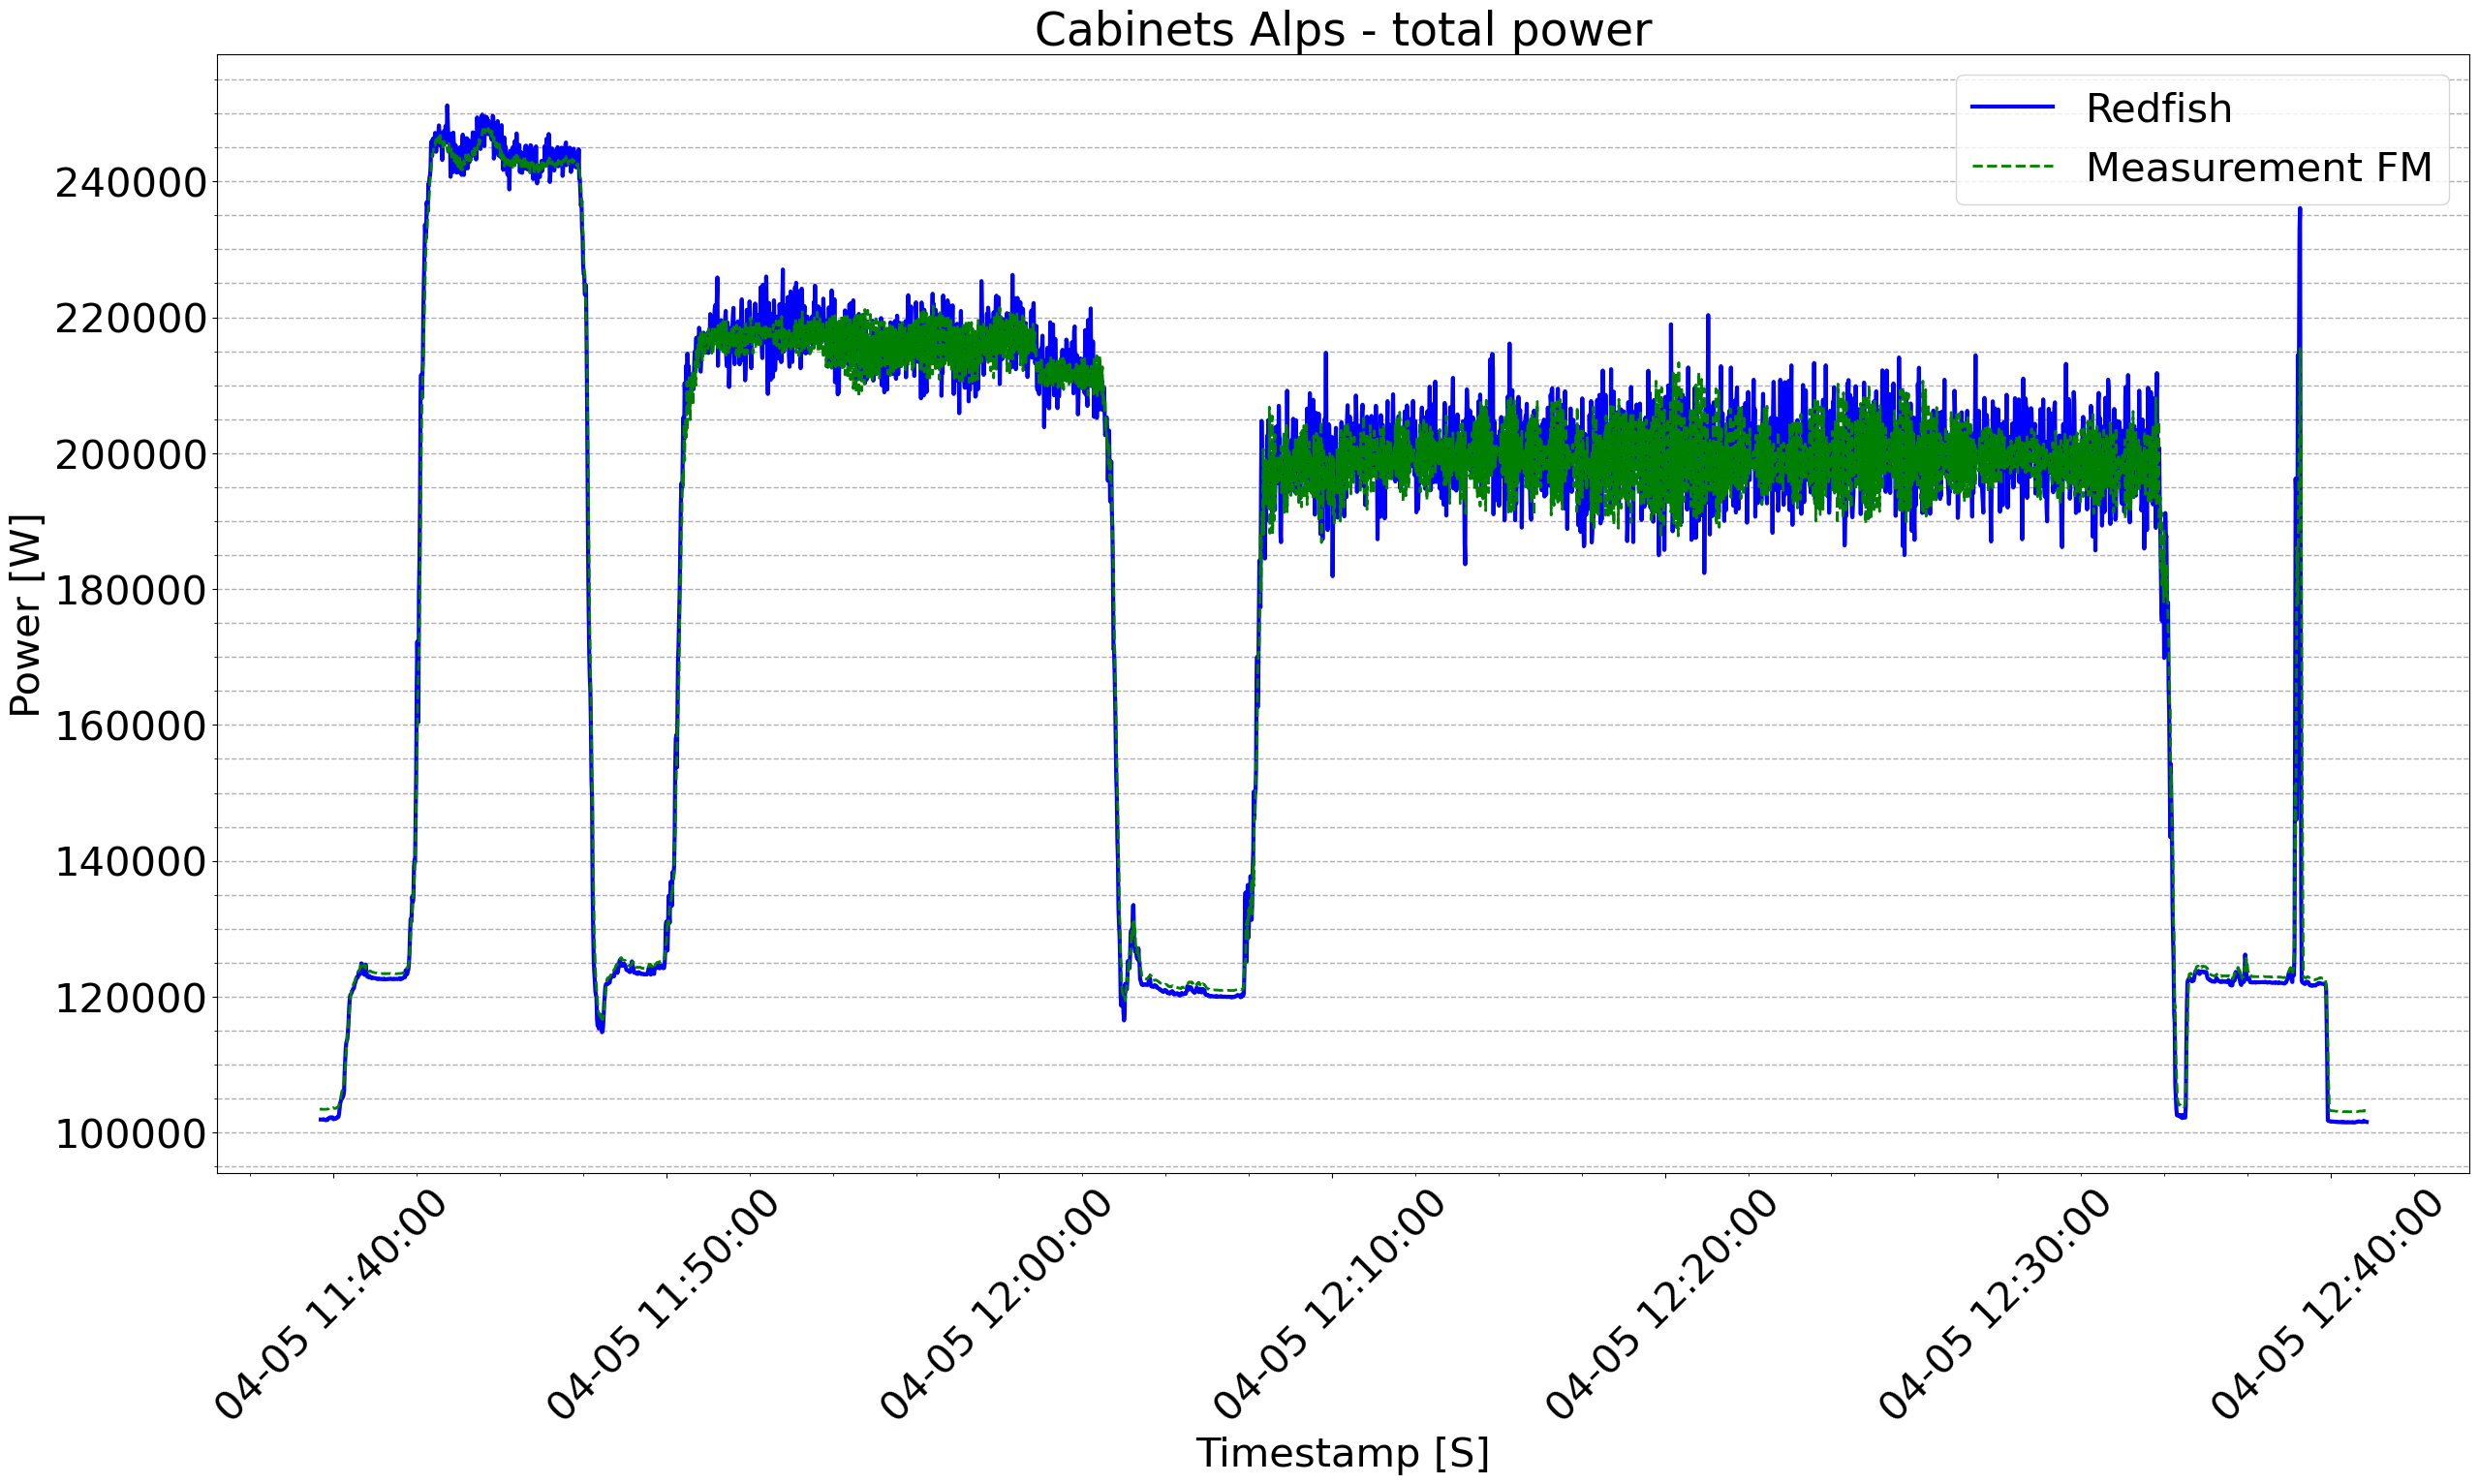

In [17]:
for name in os.listdir(directory):
    if '.csv' in name:
        print(name)
        data=pd.read_csv(directory+'/'+name)
        data.columns=['Location','Type','ReadingType','Measure','Timestamp', 'Value']

        data['Timestamp']=pd.to_datetime(data['Timestamp'],format="%Y-%m-%dT%H:%M:%S.%fZ")+dt.timedelta(hours=2)
        data=data.set_index('Timestamp')


        data['Value'].max()
        df=data
        new=df['Location'].str.split('c',n=2,expand=True)

        j=0
        cabinet_list=new.iloc[:,0].unique()
        chassis_list=new.iloc[:,1].unique()
        cabinet=0
        # print(chassis_list)
        for cab in cabinet_list:
            i=0
        # chassis_list=df_dataC[df_dataC["_source.Sensor.LocationDetail.Cabinet"]==cab]['_source.Sensor.LocationDetail.Chassie'].unique()
            for ch in chassis_list:
                df_c=df[(df['Location'].str.contains(str(cab)+'c'+str(ch)))& (df["ReadingType"].str.contains('InputPower'))]
                rectifier_list=df_c['ReadingType'].unique()
                if len(rectifier_list)==4:
                    df_c0=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('0')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c1=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('1')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c2=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('2')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c3=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('3')]['Value']).resample('1S').mean().fillna(method='ffill')
                # print(df_c0)
                    if i==0:
                        dfch=check(df_c0)+check(df_c1)+check(df_c2)+check(df_c3)
                    else: 
                        dfch=dfch+check(df_c0)+check(df_c1)+check(df_c2)+check(df_c3)
                else:
                    df_c0=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('0')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c1=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('1')]['Value']).resample('1S').mean().fillna(method='ffill')
                    df_c2=pd.DataFrame(df_c[df_c['ReadingType'].str.contains('2')]['Value']).resample('1S').mean().fillna(method='ffill')
                    if i==0:
                        dfch=check(df_c0)+check(df_c1)+check(df_c2)
                    else: 
                        dfch=dfch+check(df_c0)+check(df_c1)+check(df_c2)
                i=i+1

            cabinet=dfch
            # cabinet.columns=['Value']
            # cabinet.index.name='time'
            # cabinet.plot(figsize=(30,15),fontsize=30)
            # plt.title('Cabinet power '+str(cab)+' with maximum power: ' + str(cabinet.max()))
            # plt.xlabel('Datetime',fontsize=30)
            # plt.grid(axis='y',which='both',linewidth=1,linestyle='dashed')
            # plt.minorticks_on()

            # plt.savefig('plots/cabinet'+str(cab)+'.png',bbox_inches='tight',dpi=300)
            if j==0:
                cabinets=cabinet
            else:
                cabinets=cabinets+cabinet
            j=j+1
        
        # print(cabinets)
        cabinets['Timestamp2']=cabinets.index

        t0=cabinets.iloc[0,:]['Timestamp2']
        t1=cabinets.iloc[-1,:]['Timestamp2']
        # print(t0)
        # print(t1)
        df_fm=fm[(fm.Timestamp>=t0)&(fm.Timestamp<=t1)]
        # print(df_fm)
        plt.figure(figsize=(30, 15))
        #comment out one of the two following lines
        
        # plt.plot(df['Timestamp2'],df['Value']/df['Value'].max(),linewidth=2)
        plt.plot(cabinets['Timestamp2'],cabinets['Value'],linewidth=3,color='blue')
        plt.plot(df_fm['Timestamp'],df_fm['PT (1 s)\nW'],linewidth=2,linestyle='dashed',color='green')
        plt.fontsize=30
        plt.ylabel('Power [W]',fontsize=30)
        plt.xlabel('Timestamp [S]',fontsize=30)
        # plt.title("Cabinet x1102 Prealps - rectifier input power. Maximum Telemetry: "+str(df['Value'].max())+' Maximum Measurement: '+str(df_fm['PT (1 s)\nW'].max()), fontsize=34)
        plt.title("Cabinets Alps - total power", fontsize=34)

# plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
# plt.yticks(np.arange(50000, 100001,step=10000 ))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M:%S'))
        plt.xticks(rotation=45)
        plt.legend(['Redfish','Measurement FM'],fontsize=30)

# plt.xticks(np.arange(1, len(df_power)+1,step=50),rotation=45,minor=False)
# plt.legend(['node,jobs'])
# plt.ylim(0,350001)
#plt.xlim(0,len(df_power))
        plt.gca().tick_params(axis='both', which='major', labelsize=30)

        plt.grid(axis='y',which='both',linewidth=1,linestyle='dashed')
# plt.legend(fontsize=30)
        plt.minorticks_on()
        # plt.ylim([0, 1.2])
        plt.savefig('plots/'+str(name)+' power.png',bbox_inches='tight',dpi=300)
        plt.show()
        
        
#         df['Energy']=df['Value'].cumsum()/3600000
        
#         plt.figure(figsize=(30, 15))
#         plt.plot(df['Timestamp2'],df['Energy'],linewidth=2)
# # plt.fontsize=30
#         plt.ylabel('Energy [kWh]',fontsize=30)
#         plt.xlabel('Timestamp [S]',fontsize=30)
#         plt.title("Cabinet x1102 Prealps - total rectifier input Energy", fontsize=34)
# # plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
# # plt.yticks(np.arange(50000, 350001,step=10000 ))
# # plt.rcParams.update({'font.size': 30})
#         plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M:%S'))
#         plt.xticks(rotation=45, fontsize=34)

# # plt.xticks(np.arange(1, len(df_power)+1,step=50),rotation=45,minor=False)
# # plt.legend(['node,jobs'])
# #plt.ylim(50000,100001)
# #plt.xlim(0,len(df_power))
#         plt.gca().tick_params(axis='both', which='major', labelsize=30)

#         plt.grid(axis='y',which='both',linewidth=1,linestyle='dashed')
# # plt.legend(fontsize=30)
#         plt.minorticks_on()
#         plt.ticklabel_format(axis='y',style='plain')
#         plt.fontsize=30
#         plt.savefig('plots/'+str(name)+' energy.png',bbox_inches='tight',dpi=300)
        